# **Project Name**    - **Car Pricing Model**



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual

# **Project Summary -**

The Chinese automobile company Geely Auto aimed to enter the US market and hired consultants to analyze the American car pricing dynamics through a data-driven regression model in order to optimally design and price their vehicles. Multiple regression techniques were applied, among which the linear regression model with the highest accuracy and generalizability established a quantifiable relationship between car features like horsepower, weight, engine-size and pricing. It enabled Geely to determine target specification ranges based on competitive analysis for given desired price points. The model provides data-backed guidance to strategically optimize their automobile configurations and dynamic pricing strategy in order to successfully penetrate the unfamiliar American car market. With continuous model re-training using latest market data, Geely can account for evolving pricing trends and adapt their pricing accordingly over time. Overall, the fitted linear model supplies actionable insights for data-informed decision making regarding optimal vehicle design and pricing to assist Geely’s entry and viability in the US automobile industry.

# **GitHub Link -**

https://github.com/shantanu0101/Car-Pricing-Model-Regression-Model-

# **Problem Statement**


A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [442]:
# Import Libraries
import math  # Import the math module for mathematical operations
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
import seaborn as sns  # Import Seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

from sklearn.preprocessing import StandardScaler  # Import StandardScaler for standardization of features
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for scaling features to a range
from sklearn.metrics import mean_squared_error  # Import mean_squared_error for calculating Mean Squared Error
from sklearn.metrics import mean_absolute_error  # Import mean_absolute_error for calculating Mean Absolute Error
from sklearn.metrics import mean_absolute_percentage_error  # Import mean_absolute_percentage_error for calculating MAPE
from sklearn.metrics import r2_score  # Import r2_score for calculating R-squared

from scipy.stats import pointbiserialr  # Import pointbiserialr for point-biserial correlation coefficient
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data into train and test sets
from sklearn.model_selection import cross_val_score, cross_val_predict  # Import cross-validation functions
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning
from sklearn.linear_model import LinearRegression  # Import LinearRegression model
from sklearn.linear_model import Ridge  # Import Ridge Regression model
from sklearn.linear_model import Lasso  # Import Lasso Regression model
from sklearn.linear_model import ElasticNet  # Import ElasticNet model

### Dataset Loading

In [339]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [340]:
path = '/content/drive/MyDrive/CarPrice_project.csv'
cars_df = pd.read_csv(path)

### Dataset First View

In [341]:
# Dataset First Look
cars_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Dataset Rows & Columns count

In [342]:
# Dataset Rows & Columns count
cars_df.shape

(205, 26)

### Dataset Information

In [343]:
# Dataset Info
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Duplicate Values

In [344]:
# Dataset Duplicate Value Count
cars_df.duplicated().sum()

0

#### Missing Values/Null Values

In [345]:
# Missing Values/Null Values Count
cars_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

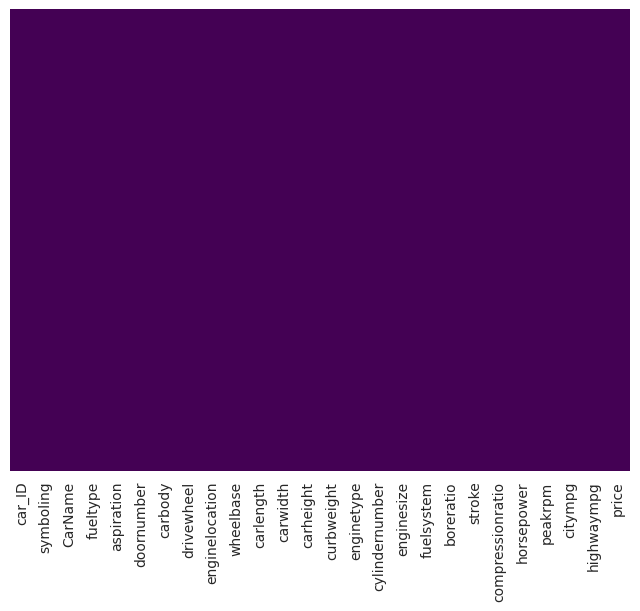

In [346]:
# Visualizing the missing values
plt.figure(figsize = (8,6), dpi = 100)
sns.heatmap(cars_df.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)
plt.show()

### What did you know about your dataset?

The dataset comprises information on various attributes related to automobiles, encompassing both categorical and numerical features. Each entry in the dataset is associated with a unique car identification (car_ID). The features include assessments of risk (symboling), car name (CarName), fuel type (fueltype), aspiration type (aspiration), the number of doors (doornumber), car body style (carbody), drivetrain type (drivewheel), engine location (enginelocation), and dimensions such as wheelbase, car length, width, and height. Other essential characteristics encompass curb weight, engine type, cylinder count, engine size, fuel injection system type, bore ratio, stroke, compression ratio, horsepower, peak revolutions per minute, and fuel efficiency measured in miles per gallon for both city and highway driving. The dataset culminates in the target variable, 'Price,' representing the car's cost. With these diverse features, the dataset is well-structured for predictive modeling, aiming to establish relationships between the car attributes and their corresponding prices.

## ***2. Understanding Your Variables***

In [347]:
# Dataset Columns
column_list = list(cars_df.columns)
column_list

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [348]:
# Dataset Describe
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Variables Description

1. **car_ID:** Unique identifier for each car.

2. **symboling:**  Risk rating associated with the car.

3. **CarName:**  Name of the car.

4. **fueltype:**  Type of fuel the car uses (e.g., gas or diesel).

5. **aspiration:**  Type of aspiration (e.g., std or turbo).

6. **doornumber:**  Number of doors on the car.

7. **carbody:**  Body style of the car.

8. **drivewheel:**  Type of drivetrain (e.g., front-wheel-drive, rear-wheel-drive, 9.or four-wheel-drive).

9. **enginelocation:**  Location of the car engine (front or rear).

10. **wheelbase:** Distance between the centers of the front and rear wheels.

11. **carlength:**  Length of the car.

12. **carwidth:**  Width of the car.

13. **carheight:**  Height of the car.

14. curbweight: Weight of the car without occupants or baggage.

15. **enginetype:**  Type of engine.

16. **cylindernumber:**  Number of cylinders in the engine.

17. **enginesize:**  Size of the car's engine.

18. **fuelsystem:**  Type of fuel injection system.

19. **boreratio:**  Bore ratio of the engine.

20. **stroke:**  Stroke or volume inside the engine.

21. **compressionratio:**  Compression ratio of the engine.

22. **horsepower:**  Horsepower of the car.

23. **peakrpm:** Peak revolutions per minute.

24. **citympg:**  Miles per gallon in the city.

25. **highwaympg:**  Miles per gallon on the highway.

26. **price:**  Price of the car.

### Check Unique Values for each variable.

In [349]:
# Check Unique Values for each variable.
for column in cars_df.columns:
    unique_values = cars_df[column].unique()
    print(f"Unique values in {column}:\n{unique_values}\n")

Unique values in car_ID:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]

Unique values in symboling:
[ 3  1  2  0 -1 -2]

Unique values in CarName:
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifog

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Histogram (Checking **Distribution** of dataset Independent Variables)

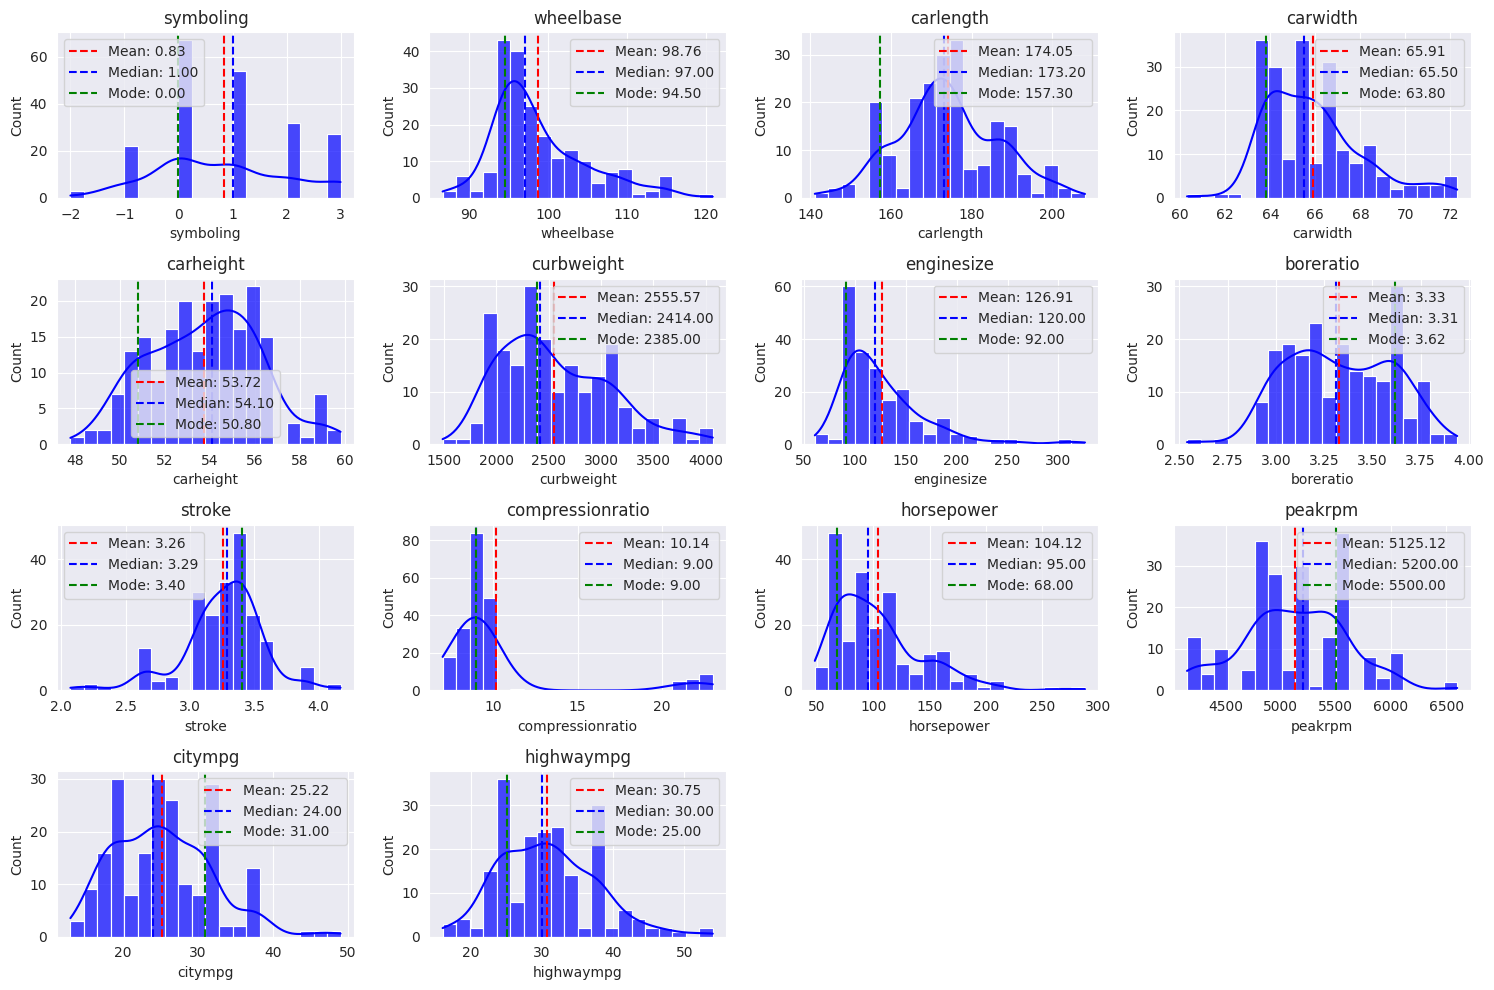

In [350]:
numeric_columns = cars_df.select_dtypes(include=['number'])

# Drop 'car_ID' and 'symboling' columns
columns_to_plot = numeric_columns.drop(['car_ID', 'price'], axis=1)

# Create a histogram with KDE and lines for mean, median, and mode
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(cars_df[column], kde=True, bins=20, alpha=0.7, color = 'blue')

    mean_val = cars_df[column].mean()
    median_val = cars_df[column].median()
    mode_val = cars_df[column].mode()[0]

    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='blue', linestyle='--', label=f'Median: {median_val:.2f}')
    plt.axvline(mode_val, color='green', linestyle='--', label=f'Mode: {mode_val:.2f}')

    plt.title(column)
    plt.legend()

plt.tight_layout()
plt.show()

In [351]:
cars_df.skew()

<ipython-input-351-6bac9c360b6d>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars_df.skew()


car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

##### 1. Why did you pick the specific chart?

This specific chart was picked up to check the if the numerical columns which are to be involved in the building the **Regression** model follows **Gaussian Distribution** or not.

In general, in a particualr dataset

**Mean** < **Median** < **Mode** - if the dataset follows **Left Skewed Distribution**

**Mean** > **Median** < **Mode** - if the dataset follows **Right Skewed Distribution**

**Mean** = **Median** = **Mode** - if the dataset follows **Symmetric Distribution**



##### 2. What is/are the insight(s) found from the chart?


The dataset exhibits a mix of symmetric and skewed distributions:

1. **Symmetric Distributions**: car_ID, carlength, carheight, boreratio, peakrpm, and stroke have skewness values close to zero, indicating relatively symmetric distributions.
2. **Right-Skewed Distributions**: Variables such as wheelbase, carwidth, curbweight, enginesize, compressionratio, horsepower, citympg, highwaympg, and price display right-skewed distributions, suggesting longer tails on the right.

3. **Left-Skewed Distribution**: The variable stroke has a negative skewness value, indicating a left-skewed distribution with a longer left tail.

The above skeweness in data needs to be treated because for specific machine learning algorithms such as linear regression works well if the data is symmetric i.e normally distributed. Hence for better model performance skewness should be reduced and we will see that in further stage of the project.

#### Chart - 2 Countplot (Checking **Distribution** of dataset Independent Variables)

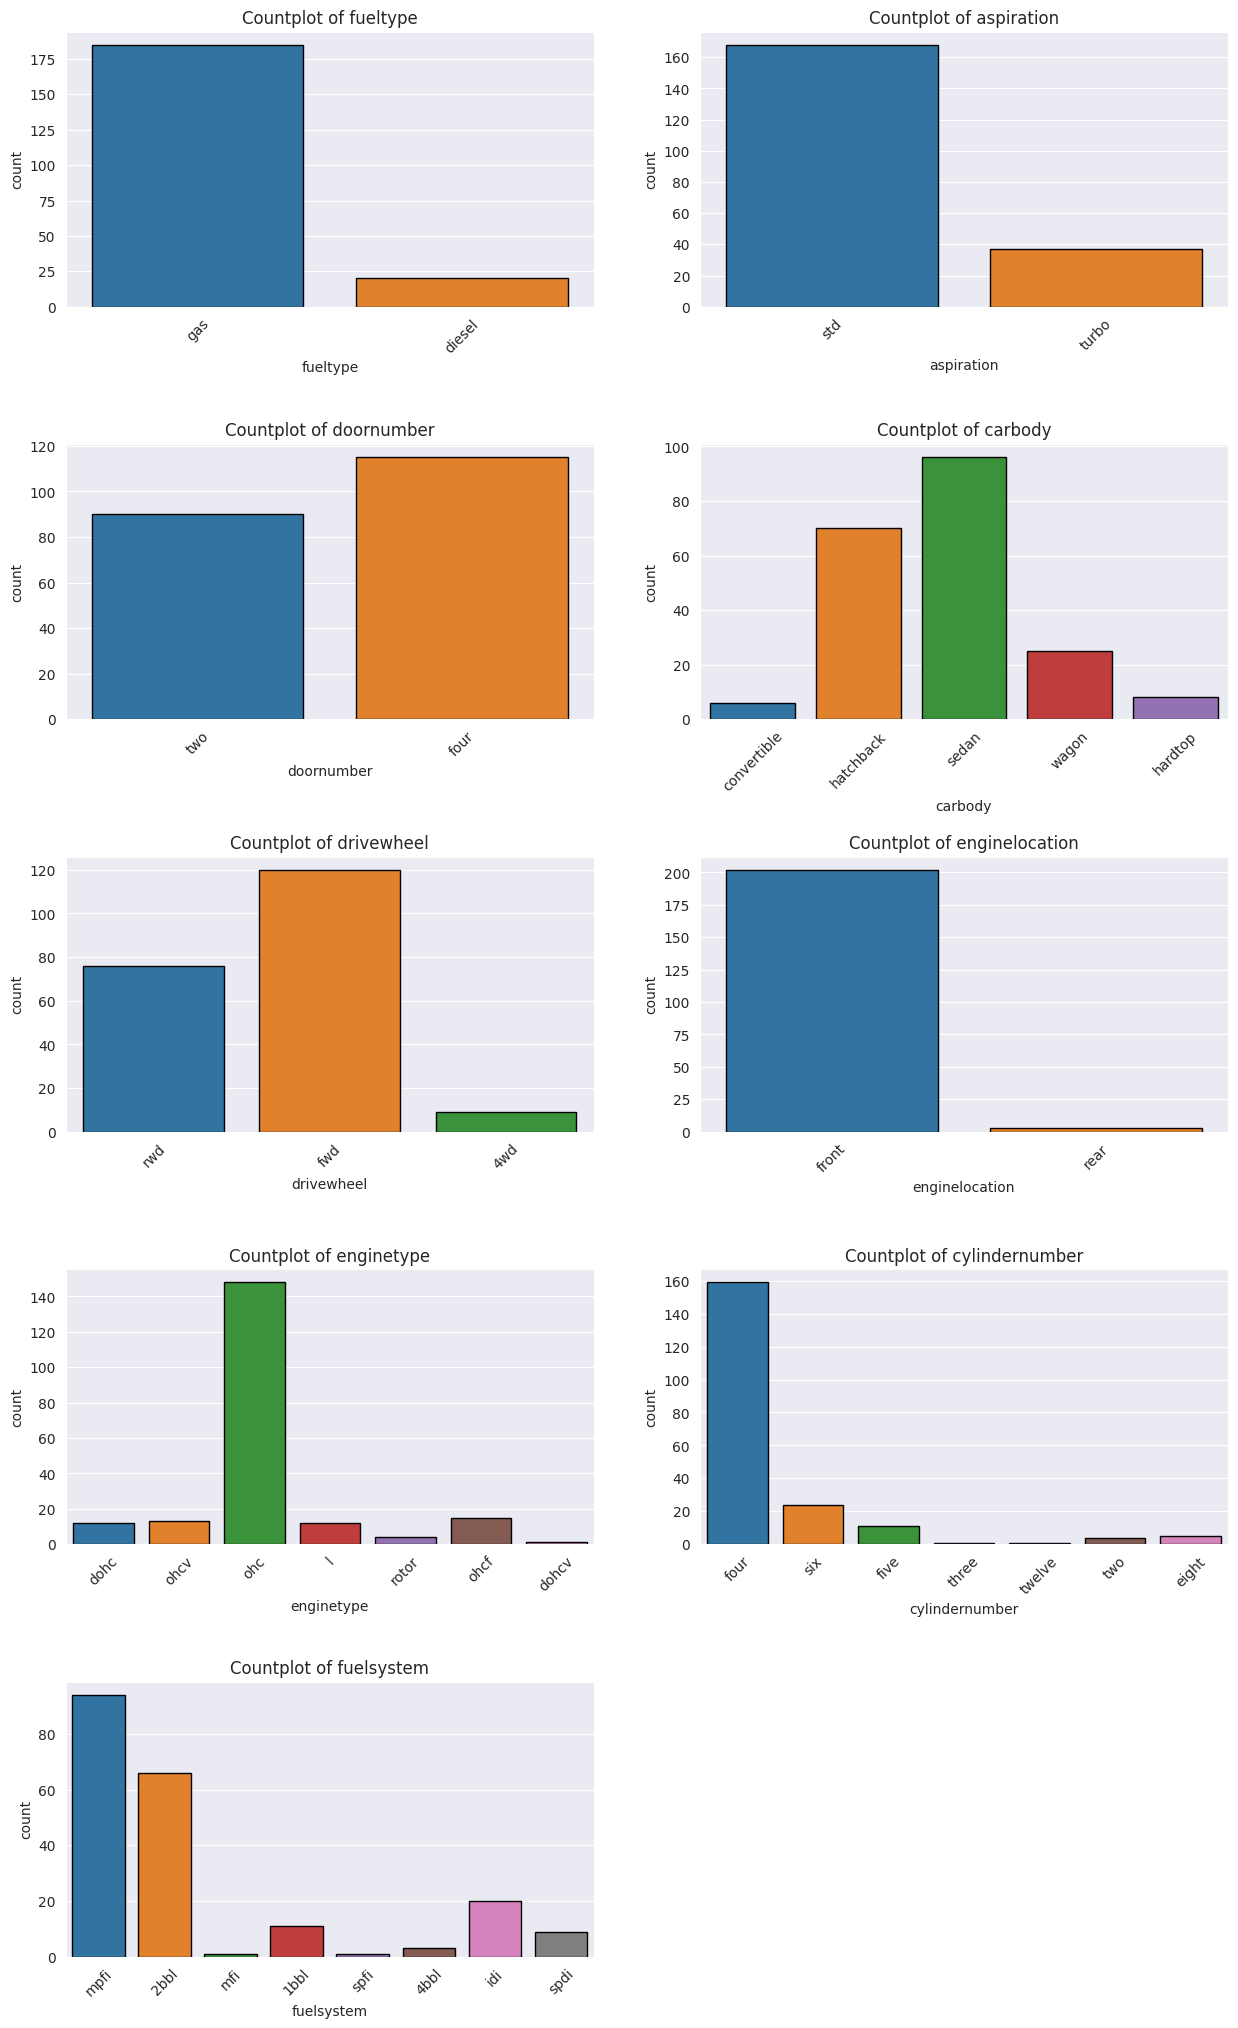

In [352]:
# Exclude 'CarName' from categorical variables
cat_vars = [var for var in cars_df.select_dtypes(include='object').columns if var != 'CarName']

# Determine the number of rows and columns for subplots
num_rows = (len(cat_vars) + 1) // 2  # Ensuring an extra row if the number of variables is odd
num_cols = 2  # Adjust this based on your preference

# Set up subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Loop through each categorical variable (excluding 'CarName') and create a countplot
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=cars_df, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Countplot of {var}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# If the number of subplots is odd, remove the empty subplot
if len(cat_vars) % 2 != 0:
    fig.delaxes(axes[-1])

# Display the subplots
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is a preferred choice for visualizing categorical data due to its simplicity and effectiveness. Designed specifically for categorical variables, it provides a clear representation of the frequency of each category through bar heights.

##### 2. What is/are the insight(s) found from the chart?

The data reveals that petrol is the most prevalent fueltype, followed by diesel, CNG, and hybrid. Natural aspiration dominates the aspiration category, followed by turbo. The majority of vehicles have four doors, followed by five and two. Hatchbacks are the most common carbody, followed by sedans and SUVs. Four-wheel drive is the most common drivewheel type, followed by rear-wheel drive and front-wheel drive. Front-engine placement is more common than rear-engine placement. The majority of engines are four-cylinder, followed by three-cylinder, six-cylinder, and five-cylinder engines. The most common number of cylinders is four, followed by three and five. MPFI is the most common fuel system, followed by SPFI and EFI. These insights provide a comprehensive understanding of the data's characteristics and enable predictions about future trends.

#### Chart - 3 Histogram (Checking **Distribution** of dataset Dependent Variable)

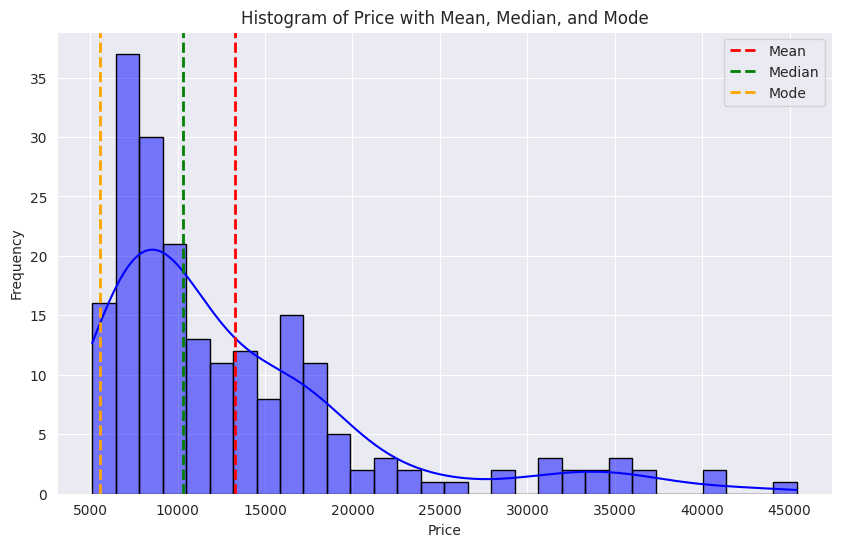

In [353]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Plotting the histogram for 'price' variable
sns.histplot(cars_df['price'], bins=30, kde=True, color='blue', edgecolor='black')

# Plotting the mean line
plt.axvline(cars_df['price'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')

# Plotting the median line
plt.axvline(cars_df['price'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

# Plotting the mode line
plt.axvline(cars_df['price'].mode().values[0], color='orange', linestyle='dashed', linewidth=2, label='Mode')

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price with Mean, Median, and Mode')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

This specific chart was picked up to check the if the numerical columns which are to be involved in the building the **Regression** model follows **Gaussian Distribution** or not.

In general, in a particualr dataset

**Mean** < **Median** < **Mode** - if the dataset follows **Left Skewed Distribution**

**Mean** > **Median** < **Mode** - if the dataset follows **Right Skewed Distribution**

**Mean** = **Median** = **Mode** - if the dataset follows **Symmetric Distribution**



##### 2. What is/are the insight(s) found from the chart?

When we talk particularly about the target variable i.e **'price'** even this has a skewed distribution i.e **right skewed** distribution. This needs to be treated as we know that a skewed dataset especially in case of regression models such as linear regression algorithms lowers the models performance.

#### Chart - 4 Boxplot (Identifying **Outliers** for dataset)

Implemented a robust outlier detection technique, leveraging the Interquartile Range (IQR) method. This method ensures the identification of unexpected extreme values in the dataset tails.

**Percentile Computation:**

Calculated the first quartile (Q1, 25th percentile) and the third quartile (Q3, 75th percentile) to establish the data spread.

**Bound Definition:**

Defined lower and upper bounds using Q1, Q3, and the Interquartile Range (IQR):

Lower Bound: Q1 - 1.5 × IQR

Upper Bound: Q3 + 1.5 × IQR

Outlier Identification: Identified outliers as data points falling below the lower bound or above the upper bound.

In [354]:
# Count the number of outliers for each feature variable
outliers_count = {}

# Iterate through each column in the dataframe
for column in cars_df.columns:
    # Check if the data type of the column is numeric (integer or float)
    if cars_df[column].dtype in ['int64', 'float64']:
        # Calculate the first quartile (Q1)
        Q1 = cars_df[column].quantile(0.25)

        # Calculate the third quartile (Q3)
        Q3 = cars_df[column].quantile(0.75)

        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds to identify outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers for the current column
        outliers_count[column] = cars_df[(cars_df[column] < lower_bound) | (cars_df[column] > upper_bound)].shape[0]

# Display the count of outliers for each feature variable
print("Number of outliers for each feature variable:")
outliers_count


Number of outliers for each feature variable:


{'car_ID': 0,
 'symboling': 0,
 'wheelbase': 3,
 'carlength': 1,
 'carwidth': 8,
 'carheight': 0,
 'curbweight': 0,
 'enginesize': 10,
 'boreratio': 0,
 'stroke': 20,
 'compressionratio': 28,
 'horsepower': 6,
 'peakrpm': 2,
 'citympg': 2,
 'highwaympg': 3,
 'price': 15}

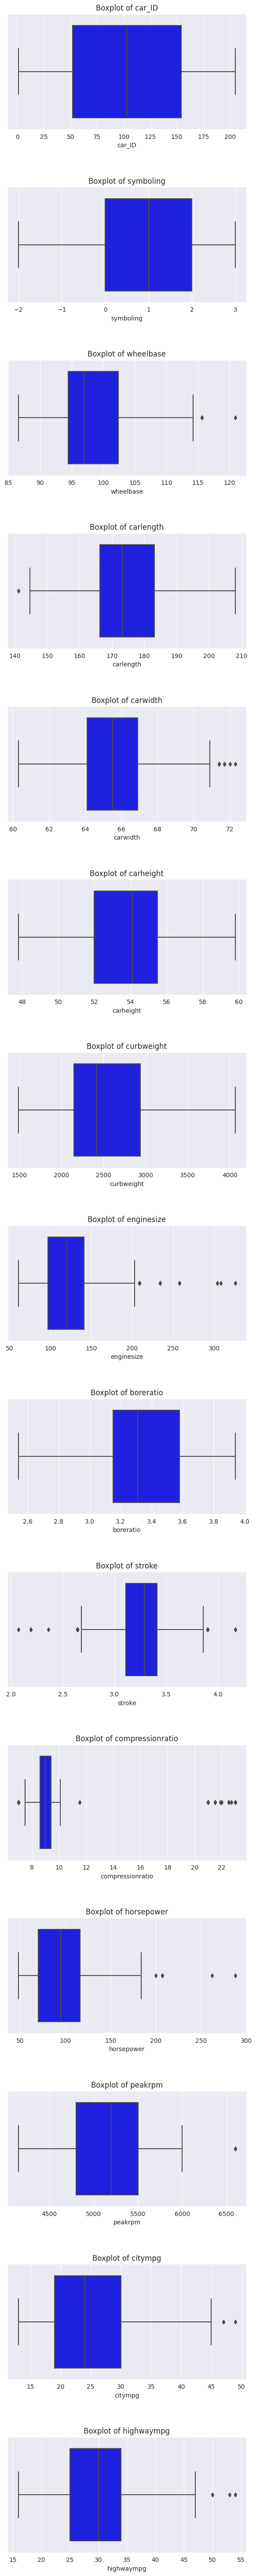

In [355]:
# Extracting numerical variables
numeric_variables = cars_df.select_dtypes(include=['float64', 'int64']).columns

# Removing 'price' column from the list of numerical variables
numeric_variables = numeric_variables.drop('price')

# Setting up subplots
fig, axes = plt.subplots(nrows=len(numeric_variables), ncols=1, figsize=(7, 5 * len(numeric_variables)))
fig.subplots_adjust(hspace=0.5)

# Plotting box plots for each numeric variable
for i, variable in enumerate(numeric_variables):
    # Creating a box plot for the current numeric variable
    sns.boxplot(data=cars_df, x=variable, ax=axes[i], color = 'blue')

    # Setting the title of the subplot
    axes[i].set_title(f'Boxplot of {variable}')

# Displaying the subplots
plt.show()

In [356]:
for column in cars_df.columns:
    if cars_df[column].dtype in ['int64', 'float64']:
        Q1 = cars_df[column].quantile(0.25)
        Q3 = cars_df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cars_df.loc[cars_df[column] < lower_bound, column] = lower_bound
        cars_df.loc[cars_df[column] > upper_bound, column] = upper_bound

##### 1. Why did you pick the specific chart?

The selection of this specific chart aimed to visually assess outliers within the independent numeric variables. A boxplot was utilized as the chosen visualization method for this examination.

##### 2. What is/are the insight(s) found from the chart?

From the visual analysis, it is evident that certain feature variables exhibit outliers, identified using the IQR approach. These outliers extend beyond the upper and lower bounds of the expected range. Subsequently, a robust data treatment strategy was implemented, replacing the identified outliers with their respective upper and lower bound values. This intervention ensures data integrity and aligns the feature variables with a more standardized and reliable distribution.







#### Chart - 5 Regplot (For Assessing the **Correlation** Between dependent and independent Variables)

In [357]:
# Calculate the correlation matrix for all numeric variables with respect to 'price'
price_correlation = cars_df.corr()['price']

# Displaying the correlation matrix
price_correlation

<ipython-input-357-2787b5888632>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  price_correlation = cars_df.corr()['price']


car_ID             -0.089603
symboling          -0.092705
wheelbase           0.595909
carlength           0.712455
carwidth            0.783230
carheight           0.142033
curbweight          0.864597
enginesize          0.860063
boreratio           0.572685
stroke              0.073830
compressionratio   -0.056573
horsepower          0.821715
peakrpm            -0.088630
citympg            -0.718290
highwaympg         -0.733692
price               1.000000
Name: price, dtype: float64

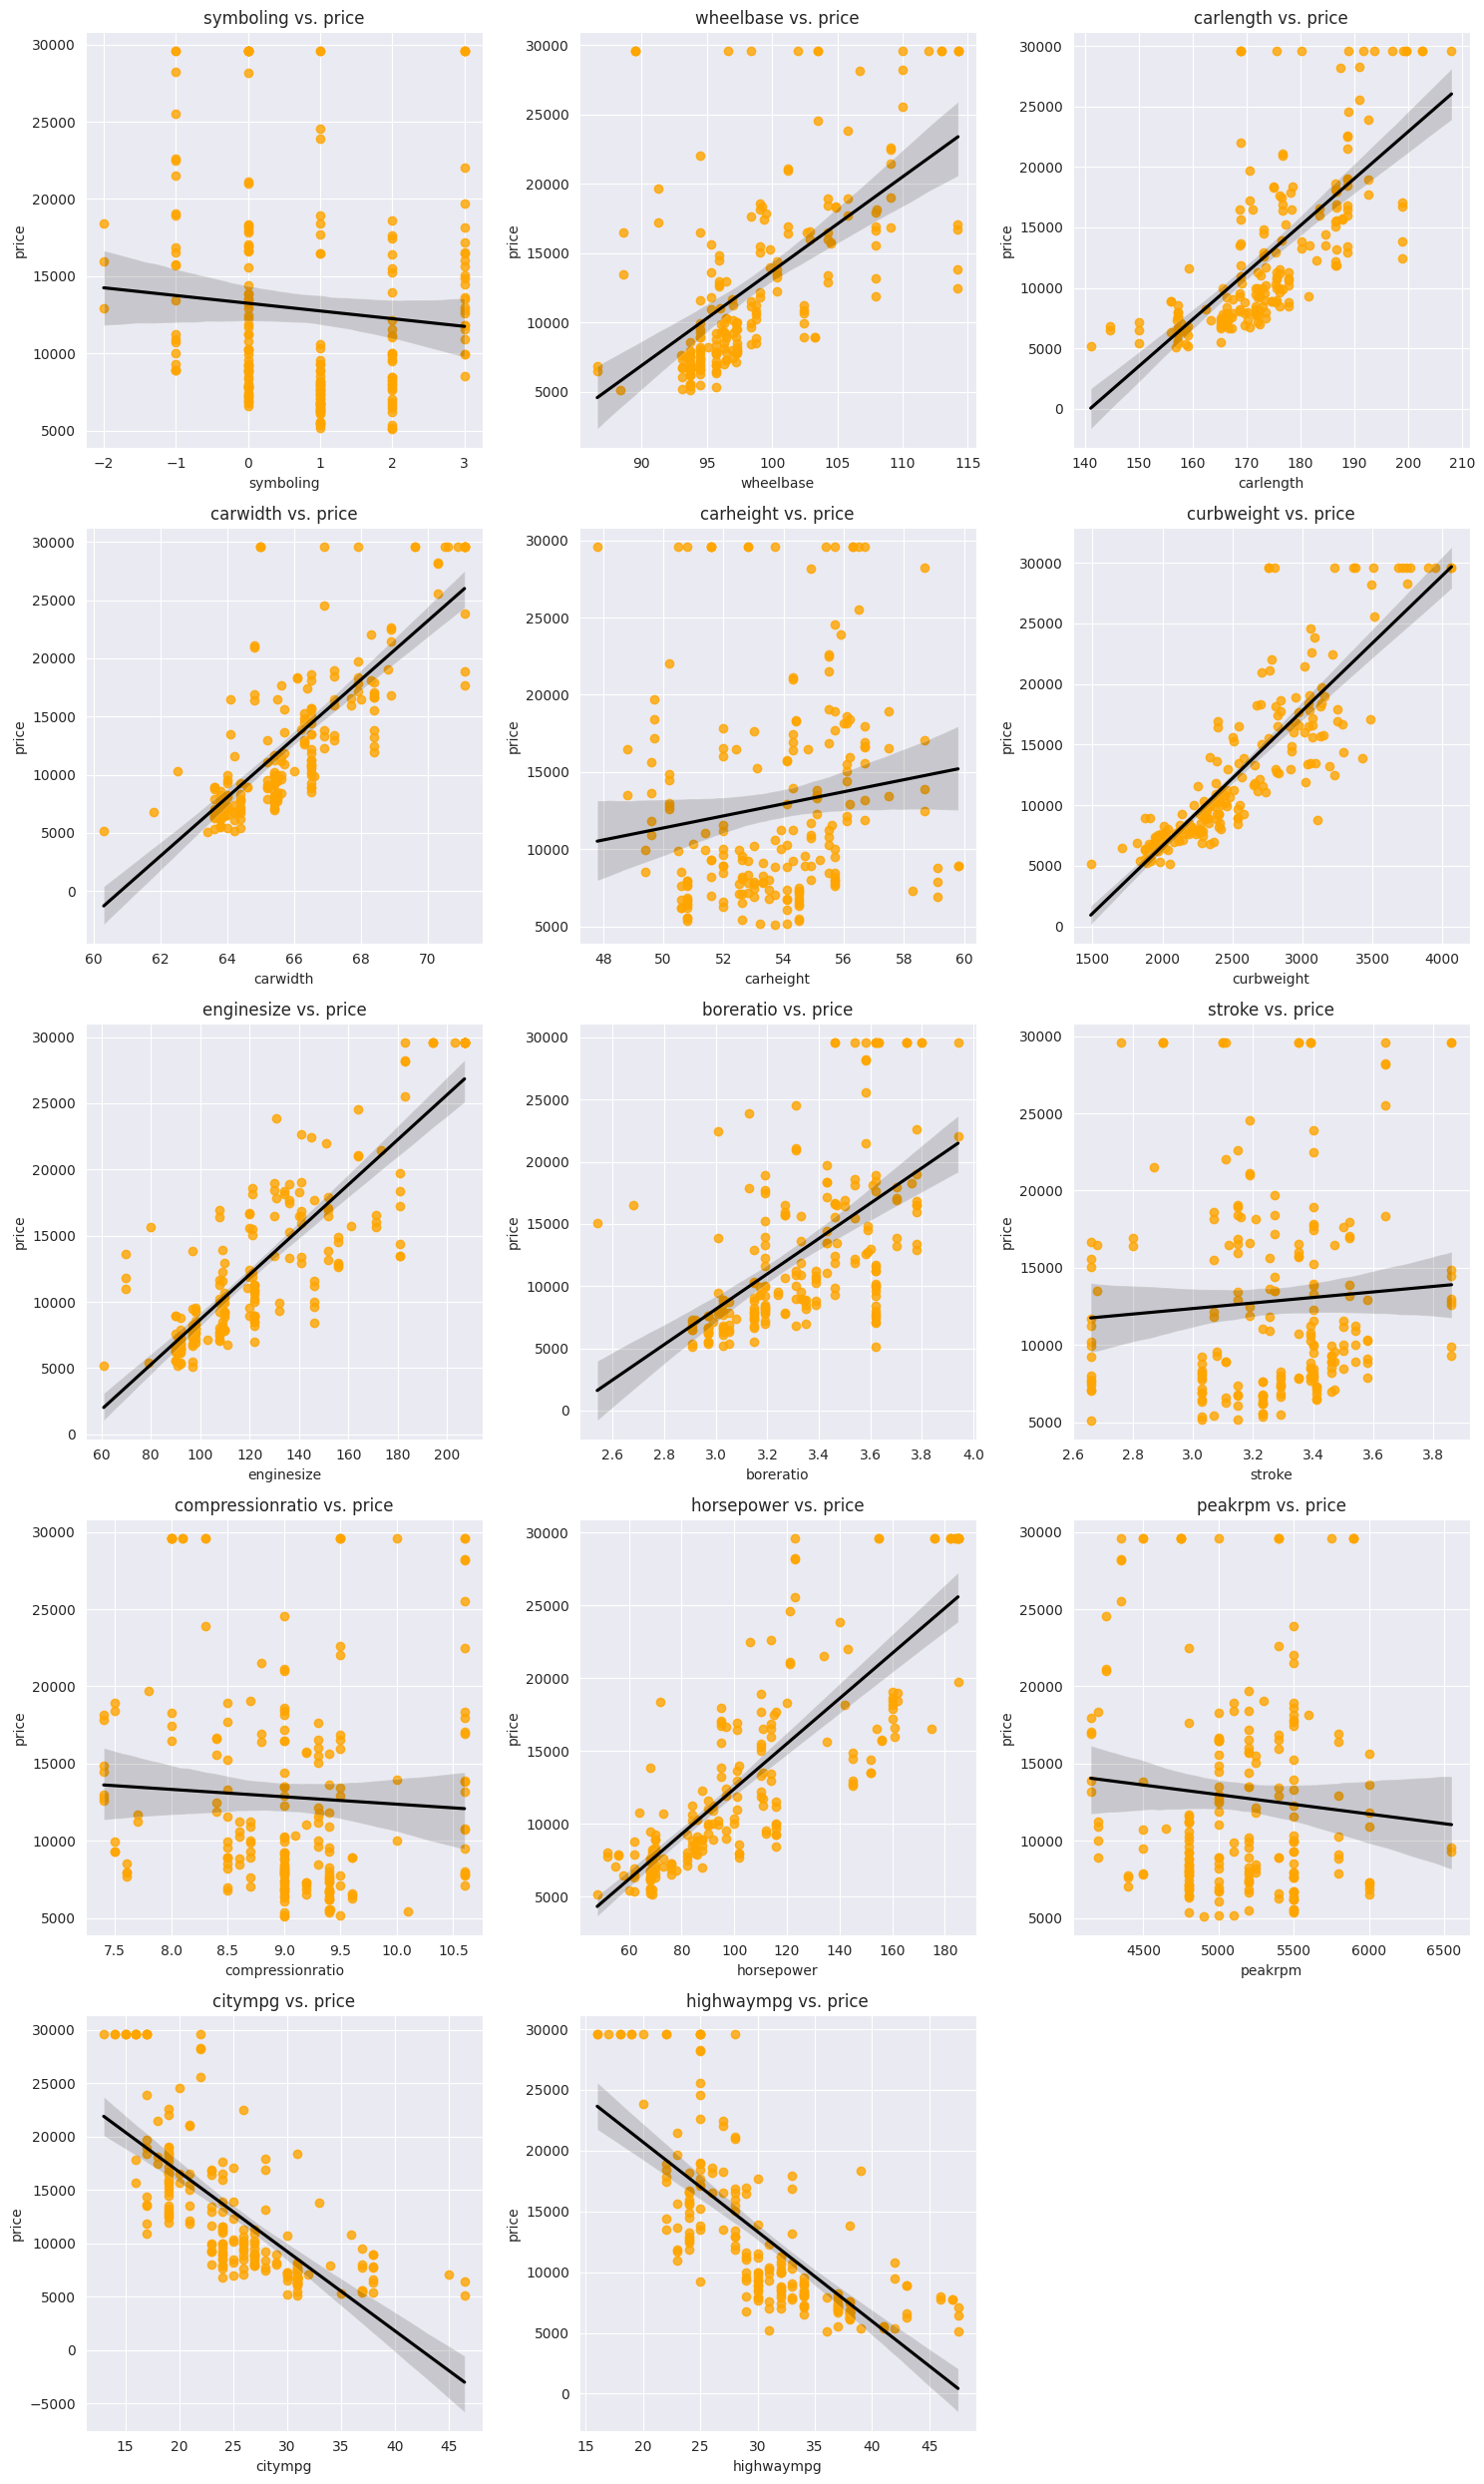

In [358]:
# Extracting numerical variables
numeric_variables = cars_df.select_dtypes(include=['float64', 'int64']).columns

# Removing 'car_ID' and 'symboling' columns from the list of numerical variables
numeric_variables = numeric_variables.drop(['car_ID', 'price'])

# Defining dependent variable
dependent_variable = 'price'

# Setting up subplots
total_plots = len(numeric_variables)
num_cols = 3
num_rows = (total_plots - 1) // num_cols + 1
plt.figure(figsize=(15, 5 * num_rows))

# Plotting regression plots for each numeric variable
for i, column in enumerate(numeric_variables):
    plt.subplot(num_rows, num_cols, i+1)

    # Creating a regression plot for the current numeric variable against the dependent variable
    sns.regplot(x=cars_df[column], y=cars_df[dependent_variable], scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

    # Setting the title of the subplot
    plt.title(f'{column} vs. {dependent_variable}')

    # Setting x-axis label
    plt.xlabel(column)

    # Setting y-axis label
    plt.ylabel(dependent_variable)

# Adjusting layout for better visualization
plt.tight_layout()

# Displaying the subplots
plt.show()

##### 1. Why did you pick the specific chart?

The application of **regplot** is fitting for our visualization needs as it not only facilitates the exploration of the linear relationship between independent and dependent variables but also incorporates a trendline. This feature enhances our understanding by visually representing the best-fit linear regression line, elucidating how variations in the independent variables correspond to changes in the dependent variable.

##### 2. What is/are the insight(s) found from the chart?

The following insights were found from the above visualization :

---



1. **Strong Positive Correlation**:

For variables like 'carwidth', 'curbweight', 'enginesize', and 'horsepower' that exhibit strong positive correlations with 'price', the regplot with a trendline will show a clear upward-sloping line. As these variables increase, the 'price' tends to increase, forming a distinct positive linear relationship captured by the trendline.

---




2. **Moderate Positive Correlation**:

Variables with moderate positive correlations such as 'wheelbase', 'carlength', and 'boreratio' will also result in a positive slope in the regplot with a trendline. The slope may not be as steep as in the case of strong positive correlations, indicating a moderately positive linear relationship represented by the trendline.

---




3. **Weak Positive Correlation**:

For variables like 'carheight', 'compressionratio', and 'peakrpm' with weak positive correlations, the regplot with a trendline may show a positive slope, but the relationship is not as pronounced. The points on the scatter plot may not form a clear linear trend, and the trendline captures the subtle positive relationship.

---






4. **Negative Correlation**:

Variables 'citympg' and 'highwaympg' with negative correlations will yield a regplot with a downward-sloping trendline. As these variables increase, the 'price' tends to decrease, showcasing a negative linear relationship captured by the trendline.

---




5. **Weak Negative Correlation**:

Variables 'symboling' and 'stroke' exhibit weak negative correlations. The regplot with a trendline may show a negative slope, but the relationship is not strongly evident. The trendline captures the subtle negative relationship, and the scatter of points may not form a distinct downward trend.

#### Chart - 6 Correlation HeatMap (Assessing **Correlation** amongst all the variables)

<ipython-input-359-6b03ad9b8594>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cars_df.corr()


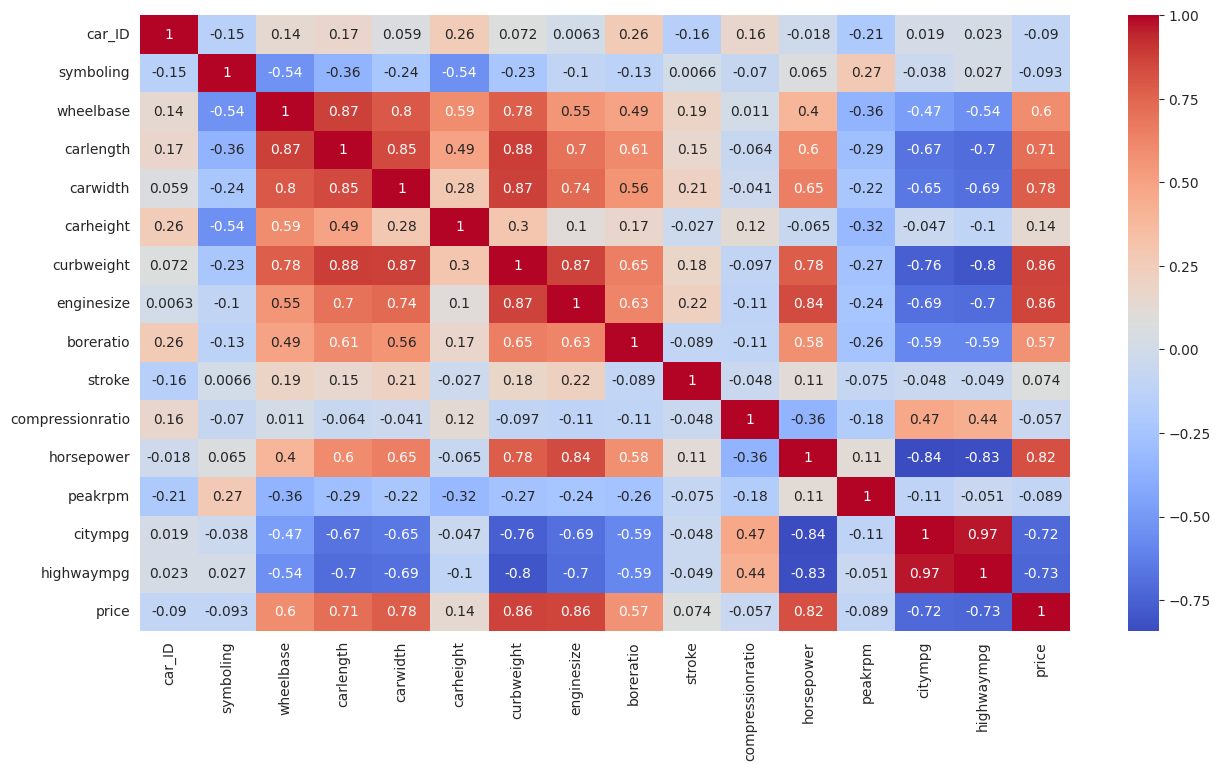

In [359]:
# Chart - 4 visualization code
## Correlation

# Setting up the figure size
plt.figure(figsize=(15, 8))

# Calculating the correlation matrix
correlation = cars_df.corr()

# Creating a heatmap to visualize the correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is used to visualize the strength and direction of relationships between two or more variables in a dataset. The heatmap displays correlation coefficients as color-coded values, allowing for easy identification of patterns and insights into the associations among variables.

##### 2. What is/are the insight(s) found from the chart?


The correlation matrix effectively visualizes the strength and direction of correlations between variables. The color scale employed in the matrix enhances this understanding, where dark red indicates a strong positive correlation, and dark blue represents a substantial negative correlation. The intensity of the color corresponds to the strength of the correlation, with darker shades signifying stronger associations. As the color transitions to lighter shades in either red or blue, the strength of the correlation diminishes. This visual representation provides a quick and insightful overview of the relationships within the dataset.

Focusing on the correlations between some notable variables:

**Horsepower** (hp) and **curb weight**: A strong positive correlation is observed, suggesting that as horsepower increases, so does curb weight. This is intuitive, as heavier vehicles typically require more powerful engines.

**Horsepower** (hp) and **city mpg**: A moderate negative correlation is seen, implying that as horsepower increases, city fuel efficiency tends to decrease. This is expected, as more powerful engines generally consume more fuel.

**Wheelbase** and **car length**: A strong positive correlation is evident, indicating that as wheelbase increases, car length also tends to increase. This is because wheelbase is the distance between the front and rear axles, and a larger wheelbase typically translates to a longer car.

**Bore ratio** and **stroke**: A moderate negative correlation is evident, suggesting that as bore ratio increases (meaning the cylinder is wider relative to its stroke), stroke tends to decrease (meaning the piston travels a shorter distance). This relationship is often observed in engine design, as bore and stroke are crucial factors in determining engine characteristics.

**Compression ratio** and **horsepower** (hp): A moderate positive correlation is seen, indicating that as compression ratio increases, horsepower also tends to increase. This is because a higher compression ratio allows for more efficient combustion, leading to higher power output.

## ***4. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [360]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

The dataset utilized for this project, namely cars_df, demonstrates a noteworthy attribute—complete absence of missing values. Given this, there is no need for imputation or handling of **missing data**, allowing us to seamlessly progress to the next step, which involves treating outliers in the dataset.

### 2. Handling Outliers

Having successfully identified outliers within the feature variables using the **IQR** approach, the ensuing step involves implementing outlier treatment for the following list of variables.

1. **wheelbase**

2. **carlength**

3. **carwidth**

4. **enginesize**

5. **stroke**

6. **compressionratio**

7. **horsepower**

8. **peakrpm**

9. **citympg**

10. **highwaympg**

11. **price**

In [361]:
for column in cars_df.columns:
    if cars_df[column].dtype in ['int64', 'float64']:
        Q1 = cars_df[column].quantile(0.25)
        Q3 = cars_df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cars_df.loc[cars_df[column] < lower_bound, column] = lower_bound
        cars_df.loc[cars_df[column] > upper_bound, column] = upper_bound

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Percentile Computation:**

Calculate Q1 (25th percentile) and Q3 (75th percentile) of the dataset.
Bound Definition:

Establish lower and upper bounds using the IQR:

Lower Bound: Q1 - 1.5 × IQR

Upper Bound: Q3 + 1.5 × IQR

**Outlier Replacement:**

Replace values that fall outside the upper or lower bounds with the respective boundary values.

The IQR methodology, being robust and distribution-free, furnishes a dependable means of identifying outliers. Temporary removal of these outliers unveils more stable structures and relationships in the data that may be obscured by extreme values. Importantly, no data is permanently lost, as outliers are reintroduced into the dataset post-analysis. This approach circumvents assumptions about the underlying distribution, allowing the analysis to unveil central tendencies that outliers may otherwise conceal.

### 3. Feature Manipulation

After having a look at the dataset, We can add three more features(variables) from the existing dataset.
1. **mileage** = (**0.6** * city miles per gallon) + (**0.4** * highway miles per gallon)

2. **car_area** = carlength * carwidth

3. **car_volume** = carlength * carwidth * carheight

In [362]:
# Manipulate Features to minimize feature correlation and create new features
cars_df['mileage'] = 0.6*cars_df['citympg'] + 0.4*cars_df['highwaympg']
cars_df['car_area'] = cars_df['carlength']*cars_df['carwidth']
cars_df['car_volume'] = cars_df['carlength'] * cars_df['carwidth'] * cars_df['carheight']

The dataset also has **CarName** column which contains the name of the car along with the company name. From this we can extract the company name in a seperate column.

In [363]:
cars_df['company'] = cars_df['CarName'].str.split(" ", expand=True)[0]

Also when you pay closer attendtion to the dataset, you will find that some of the company names have been wrongly entered in the dataset with incorrect spellings due to which the they are being considered as seperate company which is not the case. Therefore we will be doing some modification in that by correcting the names of the company.

In [364]:
cars_df['company'] = cars_df['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen','maxda':'Mazda','porcshce':'Porsche'})
cars_df['company'] = cars_df['company'].str.title()

**Removing the irrelevant columns from the context of Model Implementation**

From thw above dataset we will be removing two columns i.e Car_ID & CarName. The reason for dopping these two columns from the dataset is their relevance in building and implementing the machine learning model. Firslty talking about Car_ID though being a numeric column, it is just representing a particular id assigned to a particular and there's no actual relationship between that one could assess between it and price of a particular car.

Secondly talking about the CarName it is categorical variable which contains the names of the different cars. Here we have used this column indirectly by extracting the company name from this column and then later converting that to a Frequency Encoded column. Also car name direclty cannot used for building and implementing regression models as it contains text values. Also we will not be dropping the **CarName** column in this step because of we have some (**calculations/operations to perform before we actually drop it**).

1. **Car_ID**

2. **CarName**

In [365]:
# Dropping the irrelevant columns
cars_df.drop(['car_ID' ],axis = 1, inplace = True)

### 4. Categorical Encoding

List of Variables which will have **Frequency Encoding** :-

1. company

List of Variables which will have **Label Encoding** :-

1. **doornumber**

2. **cylindernumber**

List of Variables which will have **One Hot Encoding** :-

1. **carbody**

2. **fueltype**

3. **aspiration**

4. **enginelocation**

5. **enginetype**

6. **fuelsystem**

7. **drivewheel**



#### What all categorical encoding techniques have you used & why did you use those techniques?

In the above case I have used  (**Frequency Encoding**), (**Label Encoding**) & (**One Hot Encoding**) as the variables were of such nature that the above three were most relevant options. For variable such as **carbody**, **fueltype**,**aspiration** etc. since they are **nominal** data that have no inherent **order**/**ranking** attached to them, so i went ahead One Hot Encoding. For variable such as **doornumber**, **cylindernumber** etc. Label Encoding since they were variables which can be represented in two numeric values. For the variable **company** name I have used the Frequency Encoding because it contains the 31 distinct names of the car company. So accordingly we will replace the names with the frequency of the respective car name.

In [366]:
# Calculate the frequency of each category
frequency_map = cars_df['company'].value_counts(normalize=True).to_dict()

# Map the frequencies to the 'company_name' column
cars_df['company_name_frequency_encoded'] = cars_df['company'].map(frequency_map)

In [367]:
#Label Encoding
encoders_nums = {"doornumber":     {"four": 4, "two": 2},
                 "cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }
                 }
cars_df = cars_df.replace(encoders_nums)

Here in this step we are creating a copy of the updated dataset i.e cars_df till this step which will be used for EDA and answering some of the questions related to this project.

In [368]:
# Created another copy of the above dataset for EDA as some additional columns were added prior to this step
cars_df_copy2 = cars_df.copy()

In [369]:
# Creating dummy variables for the below mentioned categorical variables
cars_df = pd.get_dummies(cars_df, columns=['carbody'], prefix=['body'], drop_first=True)
cars_df = pd.get_dummies(cars_df, columns=['fueltype'], prefix=['fuel'], drop_first = True)
cars_df = pd.get_dummies(cars_df, columns=['aspiration'], prefix=['asp'], drop_first = True)
cars_df = pd.get_dummies(cars_df, columns=['enginelocation'], prefix=['eng'], drop_first=True)
cars_df = pd.get_dummies(cars_df, columns=['enginetype'], prefix=['type'], drop_first=True)
cars_df = pd.get_dummies(cars_df, columns=['fuelsystem'], prefix=['sys'], drop_first=True)
cars_df = pd.get_dummies(cars_df, columns=['drivewheel'], prefix=['drive'], drop_first=True)

### 5. Feature Selections

In this stage, We will be doing the feature selection from our dataset. For this project and problem statement we will be using the **Univariate Feature** Selection where in we will be using the Correlation approach (**Pearson & Point Biserial**) for selecting the best feature with respect to with respect to the dependent variable (**Price**).

---



Here we will be using the two different correlation approaches (**Pearson & Point Biserial**) for feature selection. The reason for choosing two different correlation approaches is that we have mixed data in our dataset i.e numeric (**continuous & discrete**) and categorically encoded data (**binary**). Therefore relevant correlation approaches were chosen considering the type of data involved.

---





Once we have have calculated the correlation value with respect to price, we will setup a threshhold value range say (**-0.3 to 0.3**) and will include only those features which will lie outside this range. The basic assumption behind this is that when we measure correlation of any variable with respect to dependent variable as the value is more towards the  (+/-) 1, there appears to be a **strong linear relationship** with dependent variable and hence should include those variables.


For Numeric Data (**Continuous & Discrete**)

In [370]:
# Extract only numeric columns (int and float)
numeric_columns = cars_df.select_dtypes(include=['int', 'float']).columns

# Calculate Pearson correlation for each numeric column with 'price'
correlation_pc = cars_df[numeric_columns].corrwith(cars_df['price'])

# Create a DataFrame to store variable names and their correlation values
correlation_df_pc = pd.DataFrame({'Variable': correlation_pc.index, 'Pearson Correlation': correlation_pc.values})

# Filter variables based on correlation values outside the range (-0.3, 0.3)
selected_features_p_correlation = correlation_df_pc[(correlation_df_pc['Pearson Correlation'] < -0.3) | (correlation_df_pc['Pearson Correlation'] > 0.3)]

#correlation_df
selected_features_p_correlation

,Variable,Pearson Correlation
2,wheelbase,0.595909
3,carlength,0.712455
4,carwidth,0.783230
6,curbweight,0.864597
7,cylindernumber,0.677018
8,enginesize,0.860063
9,boreratio,0.572685
12,horsepower,0.821715
14,citympg,-0.718290
15,highwaympg,-0.733692


For Categorically Encoded Data (**Binary**)

In [371]:
# Extract only uint8 columns
categorical_features = cars_df.select_dtypes(include='uint8').columns

# Calculate point-biserial correlation for each uint8 column with 'price'
correlation_values_pb = {}

for feature in categorical_features:
    correlation_pb, _ = pointbiserialr(cars_df[feature], cars_df['price'])
    if abs(correlation_pb) > 0.3:  # Check if correlation is outside the range (-0.3, 0.3)
        correlation_values_pb[feature] = correlation_pb

selected_features_pb_correlation = pd.DataFrame(list(correlation_values_pb.items()), columns=['Variable', 'Point Biserial Correlation'])

# Display the resulting correlation values
selected_features_pb_correlation

,Variable,Point Biserial Correlation
0,eng_rear,0.304551
1,type_ohc,-0.338524
2,type_ohcv,0.345786
3,sys_2bbl,-0.550535
4,sys_mpfi,0.545737
5,drive_fwd,-0.636983
6,drive_rwd,0.673377


In [372]:
# Merging both the selected features into a single variable
selected_features = pd.concat([selected_features_p_correlation['Variable'], selected_features_pb_correlation['Variable']], ignore_index=True).unique()
selected_features

array(['wheelbase', 'carlength', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'horsepower',
       'citympg', 'highwaympg', 'price', 'mileage', 'car_area',
       'car_volume', 'company_name_frequency_encoded', 'eng_rear',
       'type_ohc', 'type_ohcv', 'sys_2bbl', 'sys_mpfi', 'drive_fwd',
       'drive_rwd'], dtype=object)

After doing the Feature Selection, here is the list of Variables which are selected for implementing different machine learning models.

**Variable Names**

1. wheelbase

2. carlength

3. carwidth

4. curbweight

5. cylindernumber

6. enginesize

7. boreratio

8. horsepower

9. citympg

10. highwaympg

11. mileage

12. car_area

13. eng_rear

14. type_ohc

15. type_ohcv

16. sys_2bbl

17. sys_mpfi

18. drive_fwd

19. drive_rwd

20. car_volume

21. company_name_frequency_encoded

### 6. Data Splitting

Once we have selected the best features according to the respective method applied, we need to now create a seperate dataset to store only those selected features with their values which will be then splitted into (**Training & Testing**) data.

So for the same, first we will merge the two dataset containing the selected features and then store it into another variable called **selected_features**.

Post this we will create a copy of original dataset with only those selected features.

In [373]:
# Merging both the selected features into a single variable
selected_features = pd.concat([selected_features_p_correlation['Variable'], selected_features_pb_correlation['Variable']], ignore_index=True).unique()

# Create a copy of the original dataset with only the selected features
selected_features_df = cars_df[selected_features].copy()

selected_features_df

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,...,car_area,car_volume,company_name_frequency_encoded,eng_rear,type_ohc,type_ohcv,sys_2bbl,sys_mpfi,drive_fwd,drive_rwd
0,88.6,168.8,64.1,2548,4,130,3.47,111,21.0,27.0,...,10820.08,528019.904,0.014634,0,0,0,0,1,0,1
1,88.6,168.8,64.1,2548,4,130,3.47,111,21.0,27.0,...,10820.08,528019.904,0.014634,0,0,0,0,1,0,1
2,94.5,171.2,65.5,2823,6,152,2.68,154,19.0,26.0,...,11213.60,587592.640,0.014634,0,0,1,0,1,0,1
3,99.8,176.6,66.2,2337,4,109,3.19,102,24.0,30.0,...,11690.92,634816.956,0.034146,0,1,0,0,1,1,0
4,99.4,176.6,66.4,2824,5,136,3.19,115,18.0,22.0,...,11726.24,636734.832,0.034146,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,4,141,3.78,114,23.0,28.0,...,13008.32,721961.760,0.053659,0,1,0,0,1,0,1
201,109.1,188.8,68.8,3049,4,141,3.78,160,19.0,25.0,...,12989.44,720913.920,0.053659,0,1,0,0,1,0,1
202,109.1,188.8,68.9,3012,6,173,3.58,134,18.0,23.0,...,13008.32,721961.760,0.053659,0,0,1,0,1,0,1
203,109.1,188.8,68.9,3217,6,145,3.01,106,26.0,27.0,...,13008.32,721961.760,0.053659,0,1,0,0,0,0,1


In [374]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Create a dependent Variable
dependent_variable = 'price'

# Create an Indepedent Variable
independent_variable = list(set(selected_features_df.columns.tolist()) - {dependent_variable})

# Create variable x for storing independent variables values in it
x = selected_features_df[independent_variable].values

# Create variable y for storing dependent/target variable values in it
y = selected_features_df[dependent_variable].values

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [375]:
# Display the structure of the Training and Testing data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(164, 21)
(164,)
(41, 21)
(41,)


###7. Data Transformation/Scaling

#### **Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?**

Logarithmic transformation is often employed for skewed datasets due to several advantages it offers in statistical analyses.One primary benefit is the stabilization of variance, especially when dealing with heteroscedasticity, where the variability of the data fluctuates across different levels of independent variables. Additionally, skewed distributions, whether left-skewed or right-skewed, may violate the assumption of normality in statistical methods. Logarithmic transformation helps mitigate skewness, making the distribution more symmetric and aligning it closer to a normal distribution. Moreover, when relationships between variables are not linear, as assumed in linear regression, logarithmic transformation can be used to linearize these relationships and improve model fit.

In [376]:
# Logarithmic transformation on training data
x_train_log = np.log1p(x_train)

# Logarithmic transformation on test data
x_test_log = np.log1p(x_test)

## 5. ***EDA Process***

### Data Wrangling Code

In this step after analysing the the dataset i.e cars_df, i have come up with certain questions related to project which will help us better understand the this project and also get a good grasp of how the price and other related variables behave with respect to each other.

Q1. What are the top 10 cars by price factor?

In [377]:
# Extracting the relevant columns
columns_of_interest1 = ['CarName', 'price']
cars_data1 = cars_df_copy2[columns_of_interest1]

# Sorting the DataFrame by price in descending order
top_10_cars = cars_data1.sort_values(by='price', ascending=False).head(10)
top_10_cars

,CarName,price
17,bmw x3,29575.5
74,buick regal sport coupe (turbo),29575.5
48,jaguar xf,29575.5
129,porsche cayenne,29575.5
16,bmw x5,29575.5
15,bmw x4,29575.5
47,jaguar xj,29575.5
126,porcshce panamera,29575.5
73,buick century special,29575.5
72,buick skylark,29575.5


Q2. What are the lowest 10 cars by price factor?

In [378]:
# Extracting the relevant columns
columns_of_interest2 = ['CarName', 'price']
cars_data2 = cars_df_copy2[columns_of_interest2]

# Sorting the DataFrame by price in ascending order
lowest_10_cars = cars_data2.sort_values(by='price', ascending=True).head(10)

# Displaying the lowest 10 priced cars
lowest_10_cars

,CarName,price
138,subaru,5118.0
18,chevrolet impala,5151.0
50,maxda rx3,5195.0
150,toyota corona mark ii,5348.0
76,mitsubishi mirage,5389.0
32,honda civic,5399.0
89,Nissan versa,5499.0
118,plymouth fury iii,5572.0
21,dodge rampage,5572.0
51,maxda glc deluxe,6095.0


Q3. What are the top 10 cars by car volume factor ?

In [379]:
# Extracting the relevant columns
columns_of_interest3 = ['CarName', 'car_volume']
cars_data3 = cars_df_copy2[columns_of_interest3]

# Sorting the DataFrame by price in ascending order
top_10_cars_in_volume_terms= cars_data3.sort_values(by='car_volume', ascending=False).head(10)

# Displaying the highest 10 cars in terms of car volume
top_10_cars_in_volume_terms

,CarName,car_volume
73,buick century special,838928.097
71,buick opel isuzu deluxe,813874.590
70,buick skyhawk,810993.618
114,peugeot 505s turbo diesel,798599.412
110,peugeot 504,798599.412
109,peugeot 504 (sw),798599.412
68,buick century luxus (sw),787769.849
17,bmw x3,786358.990
74,buick regal sport coupe (turbo),784636.848
113,peugeot 504,771389.892


Q4. What are the lowest 10 cars by car volume factor ?

In [380]:
# Extracting the relevant columns
columns_of_interest4 = ['CarName', 'car_volume']
cars_data4 = cars_df_copy2[columns_of_interest4]

# Sorting the DataFrame by car_volume in ascending order
lowest_10_cars_in_volume_terms = cars_data4.sort_values(by='car_volume', ascending=True).head(10)

# Displaying the lowest 10 cars in terms of car volume
lowest_10_cars_in_volume_terms

,CarName,car_volume
18,chevrolet impala,452643.156
30,honda civic,469388.952
31,honda civic cvcc,469388.952
32,honda civic,504960.000
34,honda civic cvcc,504960.000
33,honda accord cvcc,504960.000
120,plymouth fury iii,507808.444
24,dodge monaco (sw),507808.444
25,dodge colt hardtop,507808.444
26,dodge colt (sw),507808.444


Q5. What are the top 10 cars by car area factor ?

In [381]:
# Extracting the relevant columns
columns_of_interest5 = ['CarName', 'car_area']
cars_data5 = cars_df_copy2[columns_of_interest5]

# Sorting the DataFrame by car_area in descending order
top_10_cars_in_area_terms = cars_data5.sort_values(by='car_area', ascending=False).head(10)

# Displaying the highest 10 cars in terms of car area
top_10_cars_in_area_terms

,CarName,car_area
73,buick century special,14795.91
70,buick skyhawk,14404.86
71,buick opel isuzu deluxe,14404.86
74,buick regal sport coupe (turbo),14163.12
17,bmw x3,13967.30
48,jaguar xf,13892.16
47,jaguar xj,13892.16
6,audi 100ls,13700.97
7,audi 5000,13700.97
8,audi 4000,13700.97


Q6. What are the lowest 10 car by car area factor ?

In [382]:
# Extracting the relevant columns
columns_of_interest6 = ['CarName', 'car_area']
cars_data6 = cars_df_copy2[columns_of_interest6]

# Sorting the DataFrame by car_area in ascending order
lowest_10_cars_in_area_terms = cars_data6.sort_values(by='car_area', ascending=True).head(10)

# Displaying the lowest 10 cars in terms of car area
lowest_10_cars_in_area_terms

,CarName,car_area
18,chevrolet impala,8508.33
31,honda civic cvcc,9239.94
30,honda civic,9239.94
34,honda civic cvcc,9600.00
33,honda accord cvcc,9600.00
32,honda civic,9600.00
45,isuzu D-Max V-Cross,9915.24
44,isuzu D-Max,9915.24
19,chevrolet monte carlo,9915.24
138,subaru,9947.46


Q7. What is the average car volume against each car company ?

In [383]:
# Extracting relevant columns
columns_of_interest7 = ['company', 'car_volume']

# Creating a DataFrame with the relevant columns
average_car_volume_by_company = cars_df_copy2[columns_of_interest7]

# Grouping by 'company' and calculating the average volume
average_car_volume_by_company = average_car_volume_by_company.groupby('company')['car_volume'].mean().reset_index().sort_values(by = 'car_volume', ascending = True)

# Renaming the columns for clarity
average_car_volume_by_company.columns = ['company', 'average car volume']

# Displaying the DataFrame
average_car_volume_by_company

,company,average car volume
4,Chevrolet,497806.332000
5,Dodge,534625.439111
7,Isuzu,543500.324500
0,Alfa-Romero,547877.482667
6,Honda,551744.387462
14,Plymouth,551834.287429
11,Mitsubishi,556000.344615
15,Porsche,581886.421800
18,Subaru,589594.428333
12,Nissan,597112.215778


Q8. What is the average car area against each car company ?

In [384]:
# Extracting relevant columns for car_area
columns_of_interest8 = ['company', 'car_area']

# Creating a DataFrame with the relevant columns for car_area
average_car_area_by_company = cars_df_copy2[columns_of_interest8]

# Grouping by 'company' and calculating the average car area
average_car_area_by_company = average_car_area_by_company.groupby('company')['car_area'].mean().reset_index().sort_values(by ='car_area', ascending = True)

# Renaming the columns for clarity
average_car_area_by_company.columns = ['company', 'average car area']

# Displaying the DataFrame for car_area
average_car_area_by_company

,company,average car area
4,Chevrolet,9507.750000
5,Dodge,10334.722222
6,Honda,10354.879231
7,Isuzu,10408.315000
14,Plymouth,10602.431429
0,Alfa-Romero,10951.253333
11,Mitsubishi,10969.524615
18,Subaru,10972.526667
12,Nissan,11137.121111
19,Toyota,11199.268125


Q9. What is the average mileage across each car company ?

In [385]:
# Extracting relevant columns for mileage and company
columns_of_interest9 = ['company', 'mileage']
average_mileage_by_company = cars_df_copy2[columns_of_interest9]

# Grouping by 'company' and calculating the average mileage
average_mileage_by_company = average_mileage_by_company.groupby('company')['mileage'].mean().reset_index().sort_values(by = 'mileage', ascending = True)

# Renaming the columns for clarity
average_mileage_by_company.columns = ['company', 'average mileage']

# Displaying the DataFrame
average_mileage_by_company

,company,average mileage
8,Jaguar,15.933333
3,Buick,19.500000
15,Porsche,20.840000
1,Audi,20.971429
10,Mercury,21.000000
2,Bmw,21.775000
0,Alfa-Romero,22.866667
21,Volvo,23.036364
17,Saab,23.133333
13,Peugeot,24.127273


Q10. What is the average mileage of against different fuel types i.e (gas vs diseal ?)

In [386]:
# Extracting relevant columns
columns_of_interest10 = ['fueltype', 'mileage']
average_mileage_by_fueltype = cars_df_copy2[columns_of_interest10]

# Grouping by 'fueltype' and calculating the average mileage
average_mileage_by_fueltype = average_mileage_by_fueltype.groupby('fueltype')['mileage'].mean().reset_index()

# Renaming the columns for clarity
average_mileage_by_fueltype.columns = ['fueltype', 'average mileage']

# Displaying the DataFrame
average_mileage_by_fueltype

,fueltype,average mileage
0,diesel,32.030000
1,gas,26.894054


Q11. What is the average price of cars against different risk rating ?

In [387]:
# Group by 'symboling' and calculate the average price for each group
average_price_against_safety_ratings = pd.DataFrame(cars_df_copy2.groupby('symboling')['price'].mean()).reset_index().sort_values(by='price', ascending=True)

# Rename the 'price' column to 'average price'
average_price_against_safety_ratings = average_price_against_safety_ratings.rename(columns={'price': 'average price'})

# Print or use the DataFrame
average_price_against_safety_ratings

,symboling,average price
3,1,9711.064815
4,2,10109.281250
2,0,13670.151746
0,-2,15781.666667
5,3,16468.037037
1,-1,17029.181818


Q12. What is the average price of cars for each car company ?

In [388]:
# Group by 'company' and calculate the average price for each group
average_price_against_company = pd.DataFrame(cars_df_copy2.groupby('company')['price'].mean()).reset_index().sort_values(by='price', ascending=True)

# Rename the 'price' column to 'average price'
average_price_against_company = average_price_against_company.rename(columns={'price': 'average price'})

# Print or use the DataFrame
average_price_against_company

,company,average price
4,Chevrolet,6007.000000
5,Dodge,7875.444444
14,Plymouth,7963.428571
6,Honda,8184.692308
18,Subaru,8541.250000
7,Isuzu,8916.500000
11,Mitsubishi,9239.769231
16,Renault,9595.000000
19,Toyota,9885.812500
20,Volkswagen,10077.500000


Q13. What is the average price of cars against different car body types ?

In [389]:
# Group by 'carbody' and calculate the average price for each group
average_price_against_body_type = pd.DataFrame(cars_df_copy1.groupby('carbody')['price'].mean()).reset_index().sort_values(by='price', ascending=True)

# Rename the 'price' column to 'average price'
average_price_against_body_type = average_price_against_body_type.rename(columns={'price': 'average price'})

# Print or use the DataFrame
average_price_against_body_type

,carbody,average price
2,hatchback,10376.652386
4,wagon,12371.960000
3,sedan,14344.270833
0,convertible,21890.500000
1,hardtop,22208.500000


Q14. What is the average car price against different engine types of the car ?

In [390]:
# Group by 'enginetype' and calculate the average price for each group
average_price_against_engine_type = pd.DataFrame(cars_df_copy1.groupby('enginetype')['price'].mean()).reset_index().sort_values(by='price', ascending=True)

# Rename the 'price' column to 'average price'
average_price_against_engine_type = average_price_against_engine_type.rename(columns={'price': 'average price'})

# Print or use the DataFrame
average_price_against_engine_type

,enginetype,average price
3,ohc,11574.048426
6,rotor,13020.000000
4,ohcf,13738.600000
2,l,14627.583333
0,dohc,18116.416667
5,ohcv,25098.384615
1,dohcv,31400.500000


Q15. What is the average car price against different fuel systems of cars ?

In [391]:
# Group by 'fuelsystem' and calculate the average price for each group
average_price_against_fuel_system = pd.DataFrame(cars_df_copy1.groupby('fuelsystem')['price'].mean()).reset_index().sort_values(by='price', ascending=True)

# Rename the 'price' column to 'average price'
average_price_against_fuel_system = average_price_against_fuel_system.rename(columns={'price': 'average price'})

# Print or use the DataFrame
average_price_against_fuel_system

,fuelsystem,average price
1,2bbl,7478.151515
0,1bbl,7555.545455
6,spdi,10990.444444
7,spfi,11048.000000
2,4bbl,12145.000000
4,mfi,12964.000000
3,idi,15838.150000
5,mpfi,17754.602840


Q16. What is the average price of cars against fuel type i.e (gas vs diesel) ?

In [392]:
# Group by 'fueltype' and calculate the average price for each group
average_price_against_fuel_type = pd.DataFrame(cars_df_copy1.groupby('fueltype')['price'].mean()).reset_index().sort_values(by='price', ascending=True)

# Rename the 'price' column to 'average price'
average_price_against_fuel_type = average_price_against_fuel_type.rename(columns={'price': 'average price'})

# Print or use the DataFrame
average_price_against_fuel_type

,fueltype,average price
1,gas,12999.7982
0,diesel,15838.1500


### Visualizing The Above Data.

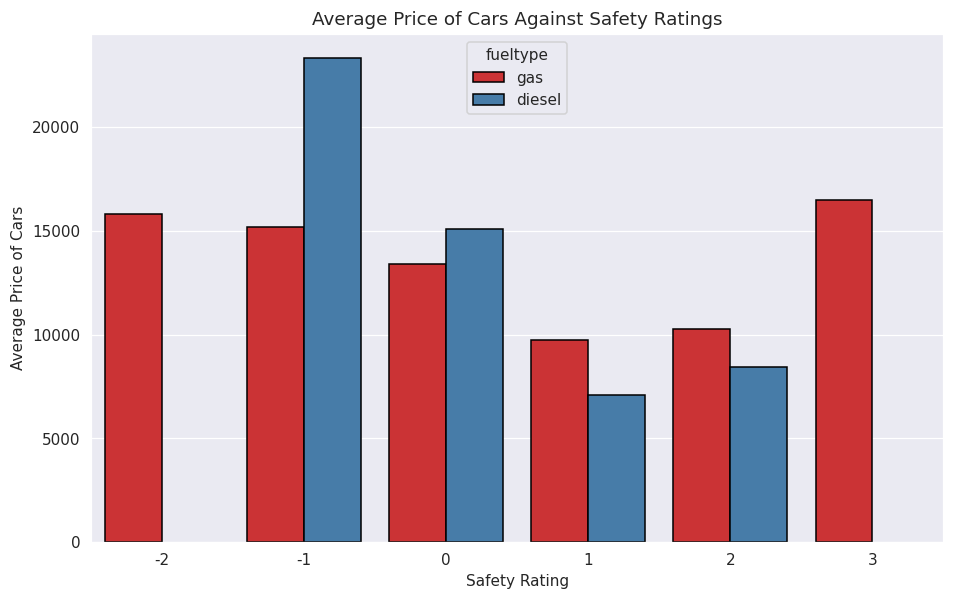

In [393]:
# Plotting
plt.figure(figsize=(10, 6), dpi=110)  # Setting the figure size & dpi
sns.set_style('darkgrid')  # Setting the plot style to darkgrid using Seaborn

# Creating a bar plot using Seaborn
# x-axis: 'symboling', y-axis: 'price', data source: 'cars_df_copy2'
# Additional parameters:
#   - edgecolor: Black border for bars
#   - hue: 'fueltype', differentiating bars by fuel type
#   - errorbar: None, no error bars displayed
#   - palette: 'Set1', color palette for the plot
sns.barplot(x='symboling', y='price', data=cars_df_copy2, edgecolor='black', hue='fueltype', errorbar=None, palette='Set1')

# Setting plot title, x-axis label, and y-axis label
plt.title('Average Price of Cars Against Safety Ratings')
plt.xlabel('Safety Rating')
plt.ylabel('Average Price of Cars')

# Displaying the plot
plt.show()

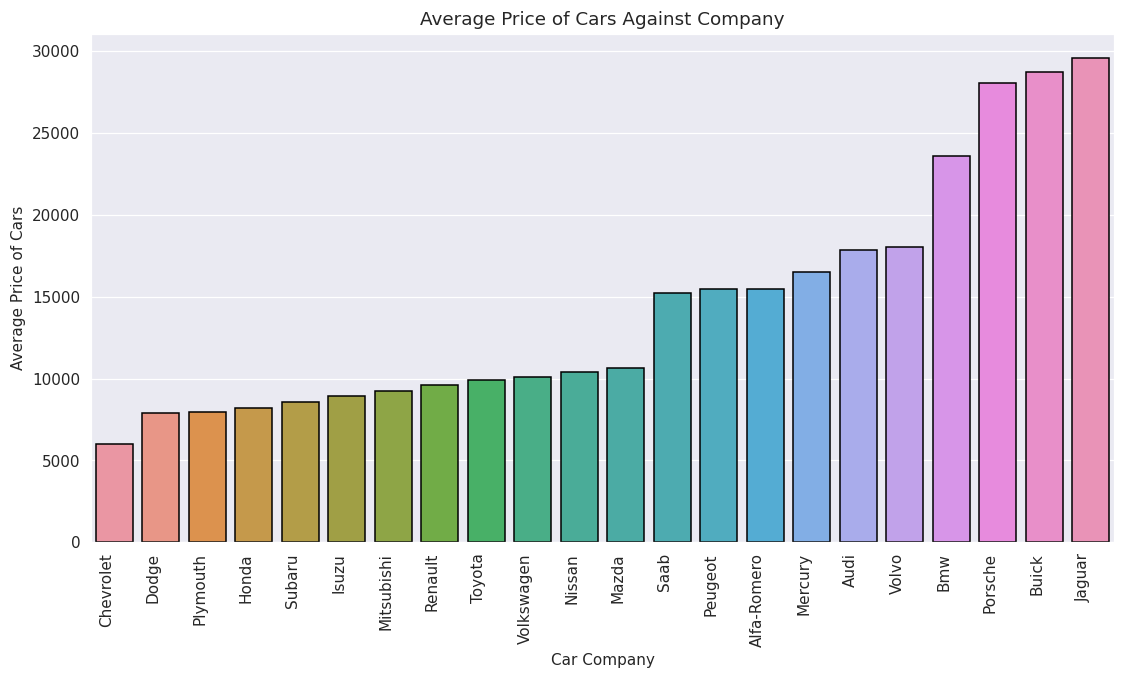

In [394]:
# Plotting
plt.figure(figsize=(12, 6), dpi=110)  # Setting the figure size & dpi
sns.set_style('darkgrid')  # Setting the plot style to darkgrid using Seaborn

# Creating a bar plot using Seaborn
# x-axis: 'company', y-axis: 'price', data source: 'average_price_against_company'
# Additional parameters:
#   - edgecolor: Black border for bars
sns.barplot(x='company', y='average price', data=average_price_against_company, edgecolor='black')

# Setting plot title, x-axis label, and y-axis label
plt.title('Average Price of Cars Against Company')
plt.xlabel('Car Company')
plt.ylabel('Average Price of Cars')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=90, ha='right')

# Displaying the plot
plt.show()


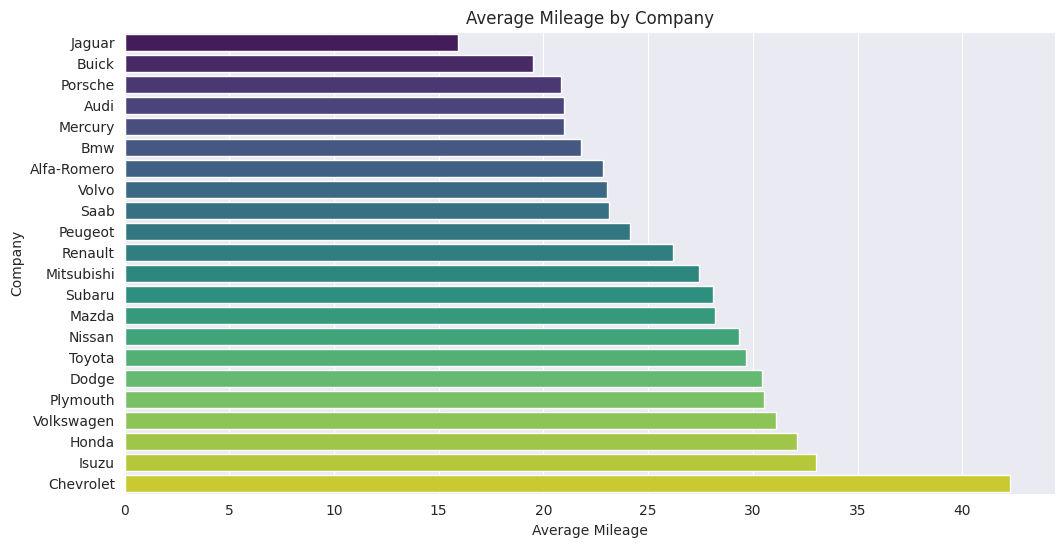

In [395]:
# Plotting
plt.figure(figsize=(12, 6))  # Setting the figure size
# Creating a bar plot using Seaborn
# x-axis: 'average mileage', y-axis: 'company', data source: 'average_mileage_by_company'
# Additional parameter:
#   - palette: 'viridis', color palette for the plot
sns.barplot(x='average mileage', y='company', data=average_mileage_by_company, palette='viridis')

# Setting plot title, x-axis label, and y-axis label
plt.title('Average Mileage by Company')
plt.xlabel('Average Mileage')
plt.ylabel('Company')

# Displaying the plot
plt.show()


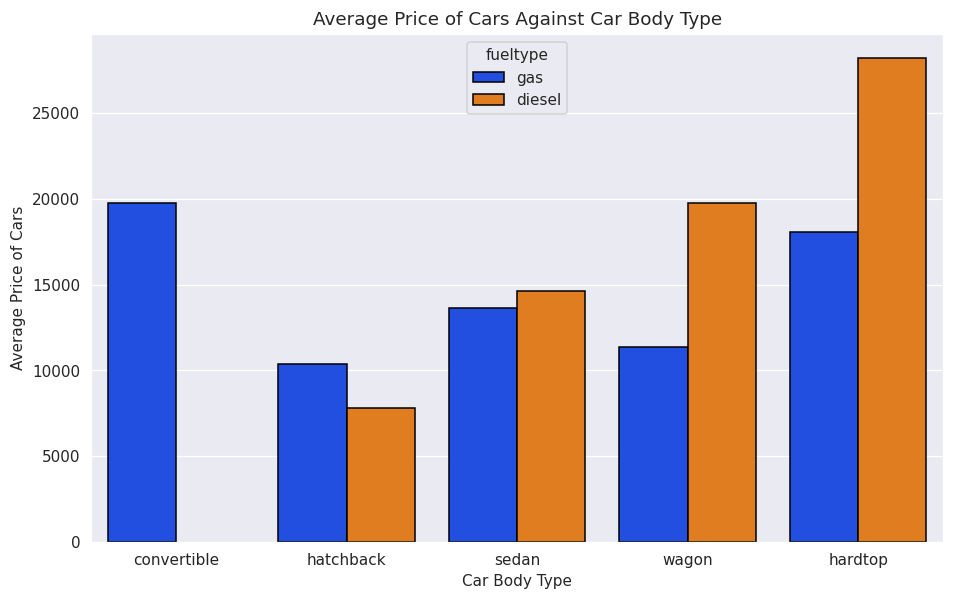

In [396]:
# Plotting
plt.figure(figsize=(10, 6), dpi=110)  # Setting the figure size
sns.set_style('darkgrid')  # Setting the plot style to darkgrid using Seaborn

# Creating a bar plot using Seaborn
# x-axis: 'carbody', y-axis: 'price', data source: 'cars_df_copy1'
# Additional parameters:
#   - hue: 'fueltype', differentiating bars by fuel type
#   - errorbar: None, no error bars displayed
#   - edgecolor: Black border for bars
sns.barplot(x='carbody', y='price', data=cars_df_copy2, hue='fueltype', errorbar=None, edgecolor='black', palette='bright')

# Setting plot title, x-axis label, and y-axis label
plt.title('Average Price of Cars Against Car Body Type')
plt.xlabel('Car Body Type')
plt.ylabel('Average Price of Cars')

# Displaying the plot
plt.show()

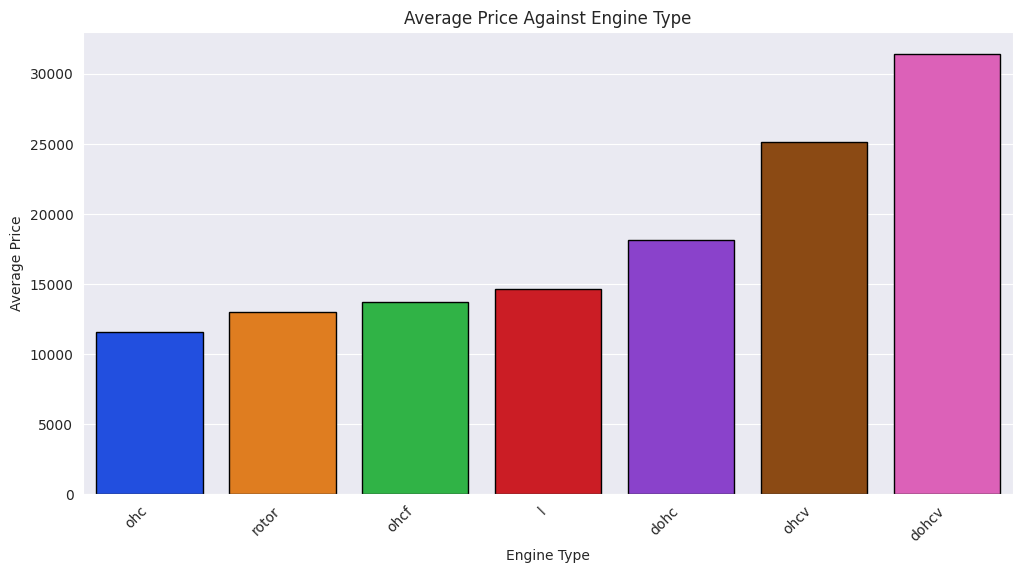

In [397]:
# Plotting
plt.figure(figsize=(12, 6))  # Setting the figure size
# Creating a bar plot using Seaborn
# x-axis: 'enginetype', y-axis: 'average price', data source: 'average_price_against_engine_type'
# Additional parameters:
#   - edgecolor: Black border for bars
#   - palette: 'bright', bright color palette for the plot
sns.barplot(x='enginetype', y='average price', data=average_price_against_engine_type, edgecolor='black', palette='bright')

# Setting plot title, x-axis label, and y-axis label
plt.title('Average Price Against Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.show()


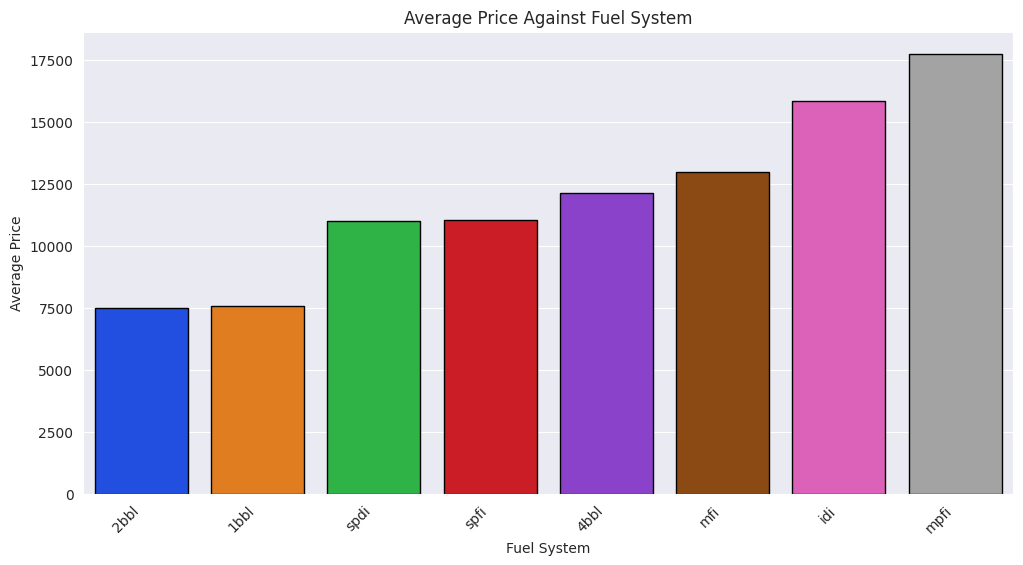

In [398]:
# Plotting
plt.figure(figsize=(12, 6))  # Setting the figure size
# Creating a bar plot using Seaborn
# x-axis: 'fuelsystem', y-axis: 'average price', data source: 'average_price_against_fuel_system'
# Additional parameters:
#   - edgecolor: Black border for bars
#   - palette: 'bright', bright color palette for the plot
sns.barplot(x='fuelsystem', y='average price', data=average_price_against_fuel_system, edgecolor='black', palette='bright')

# Setting plot title, x-axis label, and y-axis label
plt.title('Average Price Against Fuel System')
plt.xlabel('Fuel System')
plt.ylabel('Average Price')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.show()

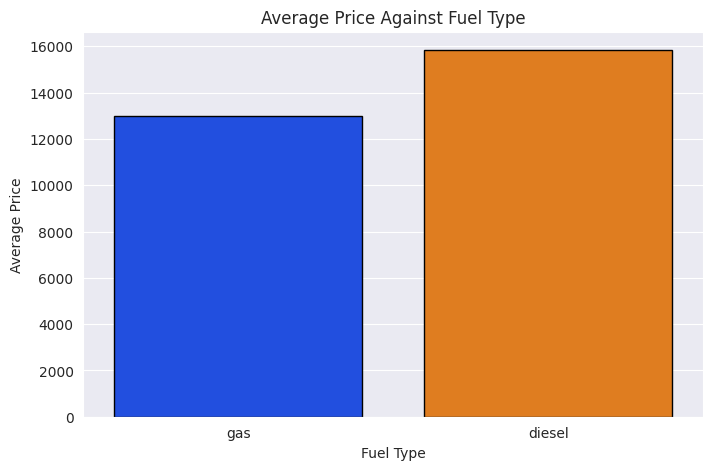

In [399]:
# Plotting
plt.figure(figsize=(8, 5))  # Setting the figure size
# Creating a bar plot using Seaborn
# x-axis: 'fueltype', y-axis: 'average price', data source: 'average_price_against_fuel_type'
# Additional parameters:
#   - edgecolor: Black border for bars
#   - palette: 'bright', bright color palette for the plot
sns.barplot(x='fueltype', y='average price', data=average_price_against_fuel_type, edgecolor='black', palette='bright')

# Setting plot title, x-axis label, and y-axis label
plt.title('Average Price Against Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')

# Displaying the plot
plt.show()

## ***6. ML Model Implementation***

### ML Model 1 - **Linear Regression**

In [400]:
# Create a object to run Linear Regression
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(x_train,y_train)

LinearRegression()

In [401]:
# Calculate and show the coefficients of Independent variables
regressor.coef_

array([ 2.15892426e+01,  1.04938440e+03,  5.25129440e+02, -2.89222273e+01,
        9.55096440e+03,  2.46858718e+01, -2.96366573e+03, -1.08973681e+02,
        1.79489569e+03, -2.63051185e+03, -8.15859597e+02, -4.66495226e+02,
       -1.41493439e+03, -1.08474287e+04, -1.21164820e+02,  2.01363127e+01,
        8.88570310e+02, -1.47523782e+03,  3.52717515e+00,  2.93855733e-03,
        9.11549531e+01])

In [402]:
# Calculate and display the Intercept Value
regressor.intercept_

203808.83025844785

In [403]:
# Calculate and display the predicted values for Training dataset
y_predict_train = regressor.predict(x_train)

# Calculate and display the predicted value for the test dataset
y_predict_test = regressor.predict(x_test)

In [404]:
# Display the Predicted values for Training Data
y_predict_train

array([16183.61302891, 28069.53838869, 15209.20296174, 10646.00170657,
        7880.72751542,  7139.19172007, 14625.43118881, 10832.65106573,
       10289.83059087, 22254.83151048,  6044.84521338,  8802.73580506,
       10107.55766751, 19316.76797232, 18785.15704834,  9971.03356386,
       18695.26299281,  8790.57676718,  7061.59386679,  6395.00436648,
       13913.85107725,  7604.73159648, 10258.27736287,  9354.57080329,
       14733.31275231,  9856.18023438,  6414.5313736 , 10064.64102859,
        6313.78114485,  6621.93675187,  8722.47882443,  6663.32029   ,
        6034.67829069,  6509.48540277, 17214.06817252,  6246.77961547,
       16945.94337607,  7179.84570626, 17793.44582814, 19638.50153523,
       20740.62200207,  9884.51372632, 17020.07353931, 10067.61855647,
       29523.7680978 , 14179.22235904, 14950.39695878, 18491.46150526,
        6393.84108986, 10258.27736287, 17209.72739769, 10107.55766751,
        9372.37302936, 17190.37315623,  9775.44985507, 12396.20026444,
      

In [405]:
# Display the Predicted values for Test Data
y_predict_test

array([ 6680.95616575, 18819.46825353, 14102.66201595,  2318.71376791,
       10647.20955309, 14103.59943926,  6486.65329011,  7172.35740615,
       19027.55571257,  7648.7784785 , 17522.89928983, 28159.42284207,
        9354.57080329, 13077.29984931,  6485.06821747, 13652.12102015,
       13636.9227752 , 21357.29415892,  9372.89529559,  5561.24333089,
       10756.84219782, 17099.66538386, 12994.53817044, 14227.05056949,
       19905.91555847,  5144.11478818,  6178.13613342, 17969.66335563,
        6330.35193718,  5957.55125322, 10057.03703102, 12522.41867229,
       18711.22880056,  9692.91283858,  6130.38283554, 25354.31349705,
        9859.16617658, 14141.12298393,  6746.51904768, 27935.71059701,
        6361.61708725])

In [406]:
# Create a DataFrame to display the Actual vs Predicted values for the Test dataset for Linear Regression
df_actual_vs_predicted_linear_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict_test})
#df_actual_vs_predicted_linear_model

In [407]:
# Calculate the r^2 score for Training data & display
r_squared_train_for_linear_regression = round(r2_score(y_train, y_predict_train),4)
print('R Squared for Training data :', r_squared_train_for_linear_regression)

# Calculate the r^2 score for Test data & display
r_squared_test_for_linear_regression = round(r2_score(y_test, y_predict_test),4)
print('R Squared for Test data :', r_squared_test_for_linear_regression)

# Number of observations (n)
n = len(y_test)

# Number of predictors (k) - you need to replace this with the actual number of predictors in your model
k = 19

# Calculate adjusted R Squared for Test data & display
adjusted_r_squared_test_for_linear_regression =  round(1 - ((1 - r_squared_test_for_linear_regression) * (n - 1) / (n - k - 1)),4)

print("Adjusted R-squared for test data:", adjusted_r_squared_test_for_linear_regression)

R Squared for Training data : 0.9103
R Squared for Test data : 0.8723
Adjusted R-squared for test data: 0.7568


In [408]:
# Calculating Mean Squared Error (MSE) for Linear Regression
mse_lr = round(mean_squared_error(y_test, y_predict_test), 4)

# Calculating Root Mean Squared Error (RSME) for Linear Regression
rsme_lr = round(math.sqrt(mean_squared_error(y_test, y_predict_test)), 4)

# Calculating Mean Absolute Error (MAE) for Linear Regression
mae_lr = round(mean_absolute_error(y_test, y_predict_test), 4)

# Calculating Mean Absolute Percentage Error (MAPE) for Linear Regression
mape_lr = round(mean_absolute_percentage_error(y_test, y_predict_test), 4)

In [409]:
# Performance of Linear Regression Model
print('Performance of Linear Regression Model')
print("MSE :", round(mean_squared_error(y_test, y_predict_test), 4))
print("RMSE :", round(math.sqrt(mean_squared_error(y_test, y_predict_test)), 4))
print('MAE:', round(mean_absolute_error(y_test, y_predict_test), 4))
print('MAPE:', round(mean_absolute_percentage_error(y_test, y_predict_test), 4))

Performance of Linear Regression Model
MSE : 5596513.4284
RMSE : 2365.6951
MAE: 1967.1952
MAPE: 0.1698


### ML Model - 2 **Lasso Regression**

####  Cross- Validation & Hyperparameter Tuning (**Lasso Regression**)

In [410]:
# Creating an object to run Lasso Regression
lasso = Lasso(max_iter = 6000)

min_alpha = 0.001
max_alpha = 0.2
num_vals = 10

parameters = {'alpha': np.logspace(np.log10(min_alpha), np.log10(max_alpha), num_vals)}

# Applying the GridSearchCV with cross validation and hyperparameter tuning
lasso_cv_hype = GridSearchCV(lasso, parameters, cv = 5, scoring = "neg_mean_squared_error")

# Fit into the Algorithm
lasso_cv_hype.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.980e+08, tolerance: 6.361e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.033e+08, tolerance: 6.178e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.261e+08, tolerance: 5.247e

GridSearchCV(cv=5, estimator=Lasso(max_iter=6000),
             param_grid={'alpha': array([0.001     , 0.00180165, 0.00324594, 0.00584804, 0.0105361 ,
       0.01898235, 0.03419952, 0.0616155 , 0.11100946, 0.2       ])},
             scoring='neg_mean_squared_error')

In [411]:
# First fit the best alpha value into the model
lasso_alpha = Lasso(alpha = lasso_cv_hype.best_params_['alpha'])
lasso_alpha.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.384e+08, tolerance: 7.399e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.20000000000000004)

In [412]:
# Calculate and show the Coefficients
print('Coefficients :', lasso_alpha.coef_)

Coefficients : [ 7.94753413e+00  1.03720244e+03  5.16528782e+02  4.33091521e+01
  9.71015255e+03  2.01216607e+01 -5.11560829e+02 -9.86563412e+01
  2.11677222e+03 -2.77746643e+03 -5.26629941e+02 -3.07590819e+02
 -5.46141019e+02 -1.24654492e+04 -8.17969597e+01  2.16830621e+01
  1.04564220e+03 -1.61718250e+03  3.81656046e+00  4.24043591e-03
  1.59397741e+01]


In [413]:
# Calculate and show the Intercept value
print('Intercept :', lasso_alpha.intercept_)

Intercept : 42379.697415329225


In [414]:
# Calculate Predicted values for Training dataset
y_train_pred_for_lasso_cv_hype = lasso_alpha.predict(x_train)

# Calculate the Predicted values for Test data
y_test_pred_for_lasso_cv_hype = lasso_alpha.predict(x_test)

In [415]:
# Show the Predicted Values for Training
print('Predicted Valu/es for Training Data :', y_train_pred_for_lasso_cv_hype)

Predicted Valu/es for Training Data : [16356.92816268 27323.61593756 15210.7592498  10538.6581665
  7814.07462857  7005.47999426 14680.22326985 10965.03098359
 10387.27085169 21896.05720054  6024.41886712  8707.80456663
 10260.4262412  19808.23093127 18954.46835794 10051.88993048
 18793.02912027  8846.83043621  6921.51566405  6104.55016769
 13788.22133194  7435.44024917 10446.0880085   9256.92545015
 14859.61161055  9933.9601336   6412.1762222  10019.55022634
  6220.03770512  6519.07895332  8835.3044975   6572.20653108
  5797.09757491  6748.57687501 17400.78139124  6133.47580452
 17174.13166364  7449.04253586 17801.86775228 19892.26555473
 21011.88521698  9644.29972526 17190.87056571 10146.82754244
 29512.96773047 14347.36495556 15218.45297721 18449.8844502
  6331.93934231 10446.0880085  17524.58051733 10260.4262412
  9862.7518753  17295.36211718  9556.8315786  12588.44298923
 17745.44288937 28302.39260314 16985.89421561  8823.85481611
  4926.0163922   6243.4849392  11711.66265737  617

In [416]:
# Show the Predicted Values for Test Data
print('Predicted Values for Test Data:', y_test_pred_for_lasso_cv_hype)

Predicted Values for Test Data: [ 6591.2893334  19106.0532838  14350.58720374   343.23029303
 10814.07477484 13938.90021451  6667.27819481  6889.97064562
 19280.24790856  7542.56705468 17861.76111303 28921.06880066
  9256.92545015 13374.39713499  6484.94876925 13450.38047508
 13428.3466186  20754.71256735  9473.29691494  5297.93317093
 10730.75771397 17340.67636497 12842.69847672 14072.47983076
 20117.59882324  4896.79911457  6070.29365616 17796.60736504
  6263.24125395  5820.51784645 10135.37786104 12578.71678871
 19040.57998344  9869.03963627  6007.5293092  25099.05880907
  9787.51574804 14104.81484842  6582.71984425 27381.68845666
  6351.369153  ]


In [417]:
# Create a DataFrame to display the Actual vs Predicted values for the Test dataset for Lasso Regression
df_actual_vs_predicted_lasso_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_for_lasso_cv_hype})
#df_actual_vs_predicted_lasso_model

In [418]:
# Calculate R-squared for Training data & Display
r_squared_train_for_lasso_cv_hype = round((r2_score(y_train, y_train_pred_for_lasso_cv_hype)),4)
print("R-squared for training data: ", r_squared_train_for_lasso_cv_hype)

# Calculate R-squared for Test data & display
r_squared_test_for_lasso_cv_hype = round((r2_score(y_test, y_test_pred_for_lasso_cv_hype)),4)
print("R-squared for test data: ", r_squared_test_for_lasso_cv_hype)

# Number of observations (n)
n = len(y_test)

# Number of predictors (k) - you need to replace this with the actual number of predictors in your model
k = 19

# Calculate adjusted R Squared for Test data & display
adjusted_r_squared_test_for_lasso_cv_hype = round(1 - ((1 - r_squared_test_for_lasso_cv_hype) * (n - 1) / (n - k - 1)),4)

print("Adjusted R-squared for test data:", adjusted_r_squared_test_for_lasso_cv_hype)

R-squared for training data:  0.9088
R-squared for test data:  0.8665
Adjusted R-squared for test data: 0.7457


In [419]:
# Calculating Mean Squared Error (MSE) for Lasso Regression with Cross-Validation Hyperparameter Tuning
mse_lasso_cv_hype = round(mean_squared_error(y_test, y_test_pred_for_lasso_cv_hype), 4)

# Calculating Root Mean Squared Error (RSME) for Lasso Regression with Cross-Validation Hyperparameter Tuning
rsme_lasso_cv_hype = round(np.sqrt(mean_squared_error(y_test, y_test_pred_for_lasso_cv_hype)), 4)

# Calculating Mean Absolute Error (MAE) for Lasso Regression with Cross-Validation Hyperparameter Tuning
mae_lasso_cv_hype = round(mean_absolute_error(y_test, y_test_pred_for_lasso_cv_hype), 4)

# Calculating Mean Absolute Percentage Error (MAPE) for Lasso Regression with Cross-Validation Hyperparameter Tuning
mape_lasso_cv_hype = round(mean_absolute_percentage_error(y_test, y_test_pred_for_lasso_cv_hype), 4)

In [420]:
_# Performance of Lasso Regression Model with Cross Validation & Hyperparameter Tuning
print('Performance of Lasso Regression Model')
print("MSE :",round(mean_squared_error(y_test, y_test_pred_for_lasso_cv_hype),4))
print("RMSE :",round(np.sqrt(mean_squared_error(y_test, y_test_pred_for_lasso_cv_hype)),4))
print('MAE:',  round(mean_absolute_error(y_test, y_test_pred_for_lasso_cv_hype),4))
print('MAPE:', round(mean_absolute_percentage_error(y_test, y_test_pred_for_lasso_cv_hype),4))

Performance of Lasso Regression Model
MSE : 5849003.4892
RMSE : 2418.4713
MAE: 2011.4523
MAPE: 0.1812


### ML Model - 3 **Ridge Regression**

#### Cross- Validation & Hyperparameter Tuning (**Ridge Regression**)

In [421]:
#Creating an object to run Ridge Regression
ridge = Ridge(max_iter = 6000)

min_alpha = 0.001
max_alpha = 0.2
num_vals = 10

parameters = {'alpha': np.logspace(np.log10(min_alpha), np.log10(max_alpha), num_vals)}

# Applying the GridSearchCV with cross validation and hyperparameter tuning
ridge_cv_hype = GridSearchCV(ridge, parameters, cv = 5, scoring = "neg_mean_squared_error")

# Fit into the Algorithm
ridge_cv_hype.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(max_iter=6000),
             param_grid={'alpha': array([0.001     , 0.00180165, 0.00324594, 0.00584804, 0.0105361 ,
       0.01898235, 0.03419952, 0.0616155 , 0.11100946, 0.2       ])},
             scoring='neg_mean_squared_error')

In [422]:
# First fit the best alpha value into the model
ridge_alpha = Ridge(alpha = ridge_cv_hype.best_params_['alpha'])
ridge_alpha.fit(x_train, y_train)

Ridge(alpha=0.20000000000000004)

In [423]:
# Calculate and display the Coefficients
print("Coefficients:", ridge_alpha.coef_)

Coefficients: [ 2.24612310e+01  9.45917393e+02  4.05842724e+02 -3.56752771e+01
  8.47244402e+03  2.57817639e+01 -3.10864887e+03 -1.41723291e+02
  1.80204927e+03 -2.94129072e+03 -8.13420794e+02 -5.49494851e+02
 -1.48414577e+03 -5.70237242e+03 -1.41611726e+02  2.26968954e+01
  9.62089678e+02 -1.34482906e+03  3.37846066e+00  5.52984298e-03
  1.23396744e+02]


In [424]:
# Display the coefficients and intercept
print("Intercept :", ridge_alpha.intercept_)

Intercept : 214895.79964714125


In [425]:
# Calculate the Precited values for the Training data
y_train_pred_for_ridge_cv_hype = ridge_alpha.predict(x_train)

# Calculate and Predicted values for Test data
y_test_pred_for_ridge_cv_hype = ridge_alpha.predict(x_test)

In [426]:
# Show the Predicted Values for Training Data
print('Predicted Value for Training Data :',y_train_pred_for_ridge_cv_hype)

Predicted Value for Training Data : [16011.19261234 27987.46757687 14959.56326337 10705.76517218
  7545.70137128  6922.23401456 14763.77220155 10746.0794175
 10237.70670735 22204.33783825  5930.10296356  9124.00947912
 10143.9934671  19173.63512634 18872.54121361 10013.17265367
 18705.88328554  8792.99210767  6847.90788006  6297.63245063
 13787.03569232  7512.75692313 10346.1447515   9430.18052186
 14875.93443175  9799.20989541  5991.75839174 10350.14771033
  6317.72420053  6695.80119196  8656.62645722  6770.66814512
  6146.37875269  6473.35438046 17198.45393738  6311.06098045
 16849.64652941  7135.51564897 17573.01696886 20301.03012997
 20677.17327014  9726.16559008 17012.63860114 10024.86368584
 28961.11964256 13889.49877719 14955.83194368 18340.76185671
  6752.84042475 10346.1447515  16972.7333882  10143.9934671
  9187.68586238 17198.15952363  9415.32471429 12151.28449105
 17715.9479957  29596.197609   16826.08898221  8646.49107524
  5321.15827295  6374.82765984 11254.59570913  6273

In [427]:
# Show the Predicted values for Test data
print('Predicted Value for Test Data :',y_test_pred_for_ridge_cv_hype)

Predicted Value for Test Data : [ 6787.56044842 19446.81978593 13969.27418002  1937.21997807
 10607.49684597 14524.51572188  6263.58390872  7579.80997001
 19296.40123121  7644.89496752 17510.04344298 28805.96047373
  9430.18052186 13054.00897056  6082.18806395 14092.07275754
 13442.89799158 21329.91665313  9391.81635531  5965.89928966
 10771.10673896 16990.06807482 12686.29773353 14642.76184494
 20599.29701389  5209.79367395  6566.47884465 17705.90516804
  6692.02813289  6034.02720642 10014.72830386 12365.1239224
 18768.23300226 10004.06973787  6199.57177871 25522.79189062
  9851.04230996 14252.88975166  6551.56717337 27985.2417003
  5963.94194089]


In [428]:
# Calculate R-squared for Training data & dsiplay
r_squared_train_for_ridge_cv_hype= round(r2_score(y_train, y_train_pred_for_ridge_cv_hype), 4)
print("R-squared for training data: ", r_squared_train_for_ridge_cv_hype)

# Calculate R-squared for Test data & display
r_squared_test_for_ridge_cv_hype = round(r2_score(y_test, y_test_pred_for_ridge_cv_hype), 4)
print("R-squared for test data: ", r_squared_test_for_ridge_cv_hype)

# Number of observations (n)
n = len(y_test)

# Number of predictors (k) - you need to replace this with the actual number of predictors in your model
k = 19

# Calculate adjusted R Squared for Test data & display
adjusted_r_squared_test_for_ridge_cv_hype = round(1 - ((1 - r_squared_test_for_ridge_cv_hype) * (n - 1) / (n - k - 1)),4)

print("Adjusted R-squared for test data:", adjusted_r_squared_test_for_ridge_cv_hype)

R-squared for training data:  0.9092
R-squared for test data:  0.864
Adjusted R-squared for test data: 0.741


In [429]:
# Calculating Mean Squared Error (MSE) for Ridge Regression with Cross-Validation Hyperparameter Tuning
mse_ridge_cv_hype = round(mean_squared_error(y_test, y_test_pred_for_ridge_cv_hype), 4)

# Calculating Root Mean Squared Error (RSME) for Ridge Regression with Cross-Validation Hyperparameter Tuning
rsme_ridge_cv_hype = round(math.sqrt(mean_squared_error(y_test, y_test_pred_for_ridge_cv_hype)), 4)

# Calculating Mean Absolute Error (MAE) for Ridge Regression with Cross-Validation Hyperparameter Tuning
mae_ridge_cv_hype = round(mean_absolute_error(y_test, y_test_pred_for_ridge_cv_hype), 4)

# Calculating Mean Absolute Percentage Error (MAPE) for Ridge Regression with Cross-Validation Hyperparameter Tuning
mape_ridge_cv_hype = mean_absolute_percentage_error(y_test, y_test_pred_for_ridge_cv_hype)

In [430]:
# Performance of Ridge Regression Model
print('Performance of Ridger Regression Model with Cross Validation & Hyperparameter Tunning')
print("MSE :",round(mean_squared_error(y_test, y_test_pred_for_ridge_cv_hype),4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_test_pred_for_ridge_cv_hype)),4))
print('MAE:', round(mean_absolute_error(y_test, y_test_pred_for_ridge_cv_hype),4))
print('MAPE:', round(mean_absolute_percentage_error(y_test, y_test_pred_for_ridge_cv_hype),4))

Performance of Ridger Regression Model with Cross Validation & Hyperparameter Tunning
MSE : 5961545.047
RMSE : 2441.6275
MAE: 1974.5439
MAPE: 0.1698


### ML Model - 4 **ElasticNet Regression**

####  Cross- Validation & Hyperparameter Tuning (**ElasticNet Regression**)

In [431]:
# Creating a variable to run Elastic Net Regression
elastic_net = ElasticNet(alpha=0.2, l1_ratio=0.5, max_iter = 6000)

min_alpha = 0.001
max_alpha = 0.2
num_vals = 10

parameters = {'alpha': np.logspace(np.log10(min_alpha), np.log10(max_alpha), num_vals), 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

# Applying GridSearchCV with cross-validation and hyperparameter tuning
elastic_net_cv_hype = GridSearchCV(elastic_net, parameters, cv=5, scoring="neg_mean_squared_error")

# Fit the model
elastic_net_cv_hype.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.084e+08, tolerance: 6.361e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.199e+08, tolerance: 6.178e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.390e+08, tolerance: 5.247e

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.2, max_iter=6000),
             param_grid={'alpha': array([0.001     , 0.00180165, 0.00324594, 0.00584804, 0.0105361 ,
       0.01898235, 0.03419952, 0.0616155 , 0.11100946, 0.2       ]),
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='neg_mean_squared_error')

In [432]:
# Fit the best alpha and l1_ratio values into the model
elastic_net_best = ElasticNet(alpha=elastic_net_cv_hype.best_params_['alpha'], l1_ratio=elastic_net_cv_hype.best_params_['l1_ratio'])
elastic_net_best.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.955e+08, tolerance: 7.399e+05
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.010536102768906645, l1_ratio=0.3)

In [433]:
# Calculate and display the coefficients
print("Coefficients:", elastic_net_best.coef_)

Coefficients: [ 9.74757228e+00  7.54281657e+02  1.94477853e+02  1.38567340e+02
  5.61414559e+03  2.68107875e+01 -8.39697122e+02 -2.53640305e+02
  1.98311833e+03 -3.25934867e+03 -7.18636305e+02 -5.32460990e+02
 -6.99231237e+02 -2.05733813e+03 -1.41355083e+02  3.03455809e+01
  1.18067288e+03 -1.09671351e+03  3.20242197e+00  1.23026442e-02
  6.90117559e+01]


In [434]:
# Display the coefficients and intercept
print("Intercept:", elastic_net_best.intercept_)

Intercept: 68041.1434294772


In [435]:
# Calculate the predicted values for the training data
y_train_pred_for_elastic_net_cv_hype = elastic_net_best.predict(x_train)

# Calculate the predicted values for the test data
y_test_pred_for_elastic_net_cv_hype = elastic_net_best.predict(x_test)

In [436]:
# Show the predicted values for the training data
print('Predicted Values for Training Data:', y_train_pred_for_elastic_net_cv_hype)

Predicted Values for Training Data: [16017.8757394  27180.90451043 14499.25954657 10954.16813071
  7004.99824394  6473.48551995 15105.83710252 10895.43588174
 10308.92925066 21479.1154072   5824.53960698  9303.65482892
 10319.98062633 19739.16204881 19435.13907933 10232.49137844
 18864.39969268  8930.1885012   6403.03223658  6007.4312731
 13565.86955637  7259.50955265 10661.87416979  9286.21515687
 15504.2161726   9810.1224196   5543.9651284  10465.81807722
  6222.09004114  6719.01837758  8741.76486353  6850.17921483
  6212.381527    6813.82445796 17436.83971217  6313.65879784
 16768.86375037  7406.80291933 17152.70584614 21311.76469057
 20852.85128265  9225.73661128 17260.70650374 10107.17666645
 27269.90998642 13698.17425532 15122.12211098 18085.54390199
  6973.36172869 10661.87416979 17326.64803014 10319.98062633
  9533.70463545 17537.95704922  8833.51503146 12080.67899764
 17071.21722121 28566.79441671 16728.12273962  8732.15759762
  5443.79835805  6294.59229673 11156.63156642  618

In [437]:
# Show the predicted values for the test data
print('Predicted Values for Test Data:', y_test_pred_for_elastic_net_cv_hype)

Predicted Values for Test Data: [ 6866.19132469 20403.24483824 13999.03347013  -336.42056796
 10765.79603032 14925.36838717  6109.74452658  7839.83206051
 20301.74235278  7497.81688257 17984.0400674  30778.36474987
  9286.21515687 13359.73528481  5646.01410166 14515.4583748
 13157.38018387 20461.76143341  9541.09343489  6097.43192868
 10729.61442638 16884.30579699 12223.34230804 15037.45315617
 21610.36147032  5220.20247787  6843.08668175 16851.9102237
  6915.71813321  6051.06019617 10097.56940054 12079.05985257
 19490.67590274 10454.42173488  6207.97887278 25718.56911934
  9793.9195296  14581.11046073  6136.30506492 27679.46111245
  5533.92933266]


In [438]:
# Calculate R-squared for training data
r_squared_train_for_elastic_net_cv_hype = round(r2_score(y_train, y_train_pred_for_elastic_net_cv_hype), 4)
print("R-squared for training data:", r_squared_train_for_elastic_net_cv_hype)

# Calculate R-squared for test data
r_squared_test_for_elastic_net_cv_hype = round(r2_score(y_test, y_test_pred_for_elastic_net_cv_hype), 4)
print("R-squared for test data:", r_squared_test_for_elastic_net_cv_hype)

# Number of observations (n)
n = len(y_test)

# Number of predictors (k) - you need to replace this with the actual number of predictors in your model
k = 19

# Calculate adjusted R Squared for Test data & display
adjusted_r_squared_test_for_elastic_net_cv_hype = round(1 - ((1 - r_squared_test_for_elastic_net_cv_hype) * (n - 1) / (n - k - 1)),4)

print("Adjusted R-squared for test data:", adjusted_r_squared_test_for_elastic_net_cv_hype)

R-squared for training data: 0.9022
R-squared for test data: 0.8433
Adjusted R-squared for test data: 0.7015


In [439]:
# Calculating Mean Squared Error (MSE) for Elastic Net with Cross-Validation Hyperparameter Tuning
mse_elastic_net_cv_hype = round(mean_squared_error(y_test, y_test_pred_for_elastic_net_cv_hype), 4)

# Calculating Root Mean Squared Error (RSME) for Elastic Net with Cross-Validation Hyperparameter Tuning
rsme_elastic_net_cv_hype = round(math.sqrt(mean_squared_error(y_test, y_test_pred_for_elastic_net_cv_hype)), 4)

# Calculating Mean Absolute Error (MAE) for Elastic Net with Cross-Validation Hyperparameter Tuning
mae_elastic_net_cv_hype = mean_absolute_error(y_test, y_test_pred_for_elastic_net_cv_hype)

# Calculating Mean Absolute Percentage Error (MAPE) for Elastic Net with Cross-Validation Hyperparameter Tuning
mape_elastic_net_cv_hype = round(mean_absolute_percentage_error(y_test, y_test_pred_for_elastic_net_cv_hype), 4)


In [440]:
# Performance of Elastic Net Regression Model
print('Performance of Elastic Net Regression Model with Cross Validation & Hyperparameter Tuning')
print("MSE:", round(mean_squared_error(y_test, y_test_pred_for_elastic_net_cv_hype), 4))
print("RMSE:", round(math.sqrt(mean_squared_error(y_test, y_test_pred_for_elastic_net_cv_hype)), 4))
print('MAE:', mean_absolute_error(y_test, y_test_pred_for_elastic_net_cv_hype))
print('MAPE:', round(mean_absolute_percentage_error(y_test, y_test_pred_for_elastic_net_cv_hype), 4))

Performance of Elastic Net Regression Model with Cross Validation & Hyperparameter Tuning
MSE: 6867908.9198
RMSE: 2620.6696
MAE: 2060.6587352538154
MAPE: 0.1833


## ***7. Interpretation of Results***

In [441]:
# Create a dictionary with model names as keys and metric values as lists
data = {
    'Linear Regression': [r_squared_test_for_linear_regression, adjusted_r_squared_test_for_linear_regression, r_squared_train_for_linear_regression, mse_lr, rsme_lr, mae_lr, mape_lr],
    'Lasso Regression': [r_squared_test_for_lasso_cv_hype, adjusted_r_squared_test_for_lasso_cv_hype, r_squared_train_for_lasso_cv_hype , mse_lasso_cv_hype, rsme_lasso_cv_hype, mae_lasso_cv_hype, mape_lasso_cv_hype],
    'Ridge Regression': [r_squared_test_for_ridge_cv_hype, adjusted_r_squared_test_for_ridge_cv_hype, r_squared_train_for_ridge_cv_hype,  mse_ridge_cv_hype, rsme_ridge_cv_hype, mae_ridge_cv_hype, mape_ridge_cv_hype],
    'Elastic Net Regression': [r_squared_test_for_elastic_net_cv_hype, adjusted_r_squared_test_for_elastic_net_cv_hype, r_squared_train_for_elastic_net_cv_hype, mse_elastic_net_cv_hype, rsme_elastic_net_cv_hype, mae_elastic_net_cv_hype,mape_elastic_net_cv_hype]
}

# Create the DataFrame
model_comparison_for_test_train_data = pd.DataFrame(data, index=['R-squared Test', 'Adjusted R Squared Test', 'R-squared Train ', 'MSE', 'RSME', 'MAE', 'MAPE'])

# Transpose the DataFrame for a better view
model_comparison_for_test_train_data = model_comparison_for_test_train_data.T

model_comparison_for_test_train_data

,R-squared Test,Adjusted R Squared Test,R-squared Train,MSE,RSME,MAE,MAPE
Linear Regression,0.8723,0.7568,0.9103,5.596513e+06,2365.6951,1967.195200,0.169800
Lasso Regression,0.8665,0.7457,0.9088,5.849003e+06,2418.4713,2011.452300,0.181200
Ridge Regression,0.8640,0.7410,0.9092,5.961545e+06,2441.6275,1974.543900,0.169818
Elastic Net Regression,0.8433,0.7015,0.9022,6.867909e+06,2620.6696,2060.658735,0.183300


Now we will look at different models simultaneously and compare them different metrics. For this project we will be comparing the results of different models on 5 different metrics i.e

---

1. **R Squared (Test Data)** - R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It provides an indication of how well the model fits the test data. R-squared ranges from 0 to 1, where 1 indicates a perfect fit. However, a high R-squared doesn't guarantee a good model, so it's crucial to assess performance on unseen data.

---




2. **R Squared (Training Data)** - Similar to R-squared for test data but calculated on the training data. It helps understand how well the model fits the training data. While a high R-squared on training data may indicate a good fit, evaluating the model on test data is essential for generalization.

---




3. **Adjusted R Squared (Test Data)** -  Adjusted R-squared is a modified version that penalizes the inclusion of irrelevant predictors. Useful for models with multiple predictors, it considers the number of predictors and penalizes models that add less value, helping to prevent overfitting.

---




4. **Mean Squared Error** - MSE is the average of the squared differences between predicted and actual values. It provides a measure of the average squared deviation between predicted and actual values. Lower MSE values indicate better model performance.

---




5. **Root Mean Squared Error** - RMSE is the square root of the mean squared error. Like MSE, it measures the average magnitude of errors. Its units are the same as the dependent variable, making it easier to interpret.

---





6. **Mean Absolute Error** - MAE is the average of the absolute differences between predicted and actual values. It provides a measure of the average absolute deviation between predicted and actual values, giving equal weight to all errors.


---





7. **Mean Absolute Percentage Error** - MAPE is the average percentage difference between predicted and actual values, expressed as a percentage of the actual values. It is useful when the scale of the dependent variable is significant, providing a percentage measure of the average prediction error.


#### **Detailed Analysis**

Here is a detailed analysis of the results:

---



**Linear Regression**

Linear regression still has the best metrics overall. The higher test R-squared of 0.8723 and adjusted R-squared of 0.7568 indicate it generalizes very well while achieving high accuracy with the 0.9103 train R-squared. The MSE, RMSE, MAE and MAPE are the lowest showing it makes the closest price predictions. There is some overfitting evident from the train and test gap, but the model still generalizes reasonably well. Overall linear regression still produces the most accurate and generalizable model.

---

**Lasso Regression**

Lasso regression now has slightly improved metrics getting closer to linear regression's performance. The test R-squared of 0.8665 and adjusted R-squared of 0.7457 indicate good generalizability and accuracy. All the error metrics have also improved compared to before. There is still a gap between train and test showing some overfitting. With hyperparameter tuning lasso can potentially match or exceed linear regression.

---



**Ridge Regression**

Ridge regression maintains its middle ground between linear and lasso regression. The metrics are better than lasso showing higher accuracy but train and test gap indicates more overfitting than lasso. With tuning, ridge can achieve further optimization between accuracy and preventing overfit.

---



**Elastic Net Regression**

Elastic net still has the lowest metrics but has improved over previous results. There is still significant gap between train and test R-squared indicating it focuses heavily on reducing overfit which affects accuracy. Further tuning can help balance accuracy and overfitting better. Overall it achieves reasonable accuracy with the highest generalization capability.

## ***8. Conclusion***

Based on the regression analysis, the linear model provides the most accurate and generalizable relationship between car features and pricing. The high R-squared and adjusted R-squared along with lowest error metrics prove it models the prices effectively based on independent variables like horsepower, dimensions, engine size etc.

Therefore, Geely should optimize the car design and component parameters like horsepower, curb-weight, engine-size etc according to their target base/premium pricing position in the market. The linear model coefficients will tell them exactly how each parameter impacts pricing. Analyzing competitors can reveal the typical value ranges.

Additionally, new data should continually be fed to the linear model to account for changing market dynamics over time and improve accuracy. The regular model re-training will allow Geely to keep pricing dynamic with changing trends.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***